In [1]:
import requests
import pandas as pd
import json
from pandas import DataFrame
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd

In [2]:
response = requests.get("http://api.open-notify.org/this-api-doesnt-exist")

In [3]:
print(response.status_code)

404


In [30]:
response = requests.get("https://www.mountainproject.com/data/get-routes-for-lat-lon?lat=34&lon=-116.1&maxDistance=50&minDiff='V2+'&maxDiff='V2+'&key=200588892-9fbd8573f0fe567a7983d3ab5ae62924")
print(response.status_code)

200


In [31]:
print(response.json())

{'routes': [{'id': 105805108, 'name': 'The Vampire', 'type': 'Trad', 'rating': '5.11a', 'stars': 5, 'starVotes': 163, 'pitches': 4, 'location': ['California', 'Tahquitz & Suicide Rocks', 'Tahquitz Rock', '(f) West Face Bulge Routes', 'Upper Bulge Routes'], 'url': 'https://www.mountainproject.com/route/105805108/the-vampire', 'imgSqSmall': 'https://cdn-files.apstatic.com/climb/106110420_sqsmall_1558649298.jpg', 'imgSmall': 'https://cdn-files.apstatic.com/climb/106110420_small_1558649298.jpg', 'imgSmallMed': 'https://cdn-files.apstatic.com/climb/106110420_smallMed_1558649298.jpg', 'imgMedium': 'https://cdn-files.apstatic.com/climb/106110420_medium_1558649298.jpg', 'longitude': -116.6846, 'latitude': 33.7601}, {'id': 105722593, 'name': 'White Rastafarian', 'type': 'Boulder', 'rating': 'V2 R', 'stars': 4.9, 'starVotes': 148, 'pitches': '', 'location': ['California', 'Joshua Tree National Park', '*Joshua Tree Bouldering*', 'Outback Bouldering', 'White Rastafarian Boulder'], 'url': 'https://

In [32]:
import json

def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent = 4)
    print(text)

    
jprint(response.json())

{
    "routes": [
        {
            "id": 105805108,
            "imgMedium": "https://cdn-files.apstatic.com/climb/106110420_medium_1558649298.jpg",
            "imgSmall": "https://cdn-files.apstatic.com/climb/106110420_small_1558649298.jpg",
            "imgSmallMed": "https://cdn-files.apstatic.com/climb/106110420_smallMed_1558649298.jpg",
            "imgSqSmall": "https://cdn-files.apstatic.com/climb/106110420_sqsmall_1558649298.jpg",
            "latitude": 33.7601,
            "location": [
                "California",
                "Tahquitz & Suicide Rocks",
                "Tahquitz Rock",
                "(f) West Face Bulge Routes",
                "Upper Bulge Routes"
            ],
            "longitude": -116.6846,
            "name": "The Vampire",
            "pitches": 4,
            "rating": "5.11a",
            "starVotes": 163,
            "stars": 5,
            "type": "Trad",
            "url": "https://www.mountainproject.com/route/105805108/the-vampi

In [22]:
routes = response.json()['routes']
#jprint(routes)
json.dumps(routes)

'[{"id": 105805108, "name": "The Vampire", "type": "Trad", "rating": "5.11a", "stars": 5, "starVotes": 163, "pitches": 4, "location": ["California", "Tahquitz & Suicide Rocks", "Tahquitz Rock", "(f) West Face Bulge Routes", "Upper Bulge Routes"], "url": "https://www.mountainproject.com/route/105805108/the-vampire", "imgSqSmall": "https://cdn-files.apstatic.com/climb/106110420_sqsmall_1558649298.jpg", "imgSmall": "https://cdn-files.apstatic.com/climb/106110420_small_1558649298.jpg", "imgSmallMed": "https://cdn-files.apstatic.com/climb/106110420_smallMed_1558649298.jpg", "imgMedium": "https://cdn-files.apstatic.com/climb/106110420_medium_1558649298.jpg", "longitude": -116.6846, "latitude": 33.7601}, {"id": 105722593, "name": "White Rastafarian", "type": "Boulder", "rating": "V2 R", "stars": 4.9, "starVotes": 148, "pitches": "", "location": ["California", "Joshua Tree National Park", "*Joshua Tree Bouldering*", "Outback Bouldering", "White Rastafarian Boulder"], "url": "https://www.mounta

In [23]:
df=DataFrame(routes)
df

id                                            name     type  \
0   105805108                                     The Vampire     Trad   
1   105722593                               White Rastafarian  Boulder   
2   105722065                                Illusion Dweller     Trad   
3   105721816  Figures on a Landscape (aka Monkey on My Back)     Trad   
4   105788563                             Flower of High Rank     Trad   
5   105721822             Leave it to Beaver (aka The Beaver)     Trad   
6   105725122                                Coarse and Buggy     Trad   
7   105794117                                       Open Book     Trad   
8   105725464                                           JBMFP  Boulder   
9   105798191                                        Whodunit     Trad   
10  105725101                                         Rubicon     Trad   
11  105722992                                          Pigpen  Boulder   
12  105722755                                       Slashface  Boulder   
13  105721624                                    Bird of Fire     Trad   
14  105722113                                       Hot Rocks     Trad   
15  105722197                                          EBGB's     Trad   
16  105722353                                O'Kelley's Crack     Trad   
17  105788132                                        Sundance     Trad   
18  105722356                                    Wangerbanger     Trad   
19  105722350                                        Gunsmoke  Boulder   
20  106039374                                     Fry Problem  Boulder   
21  105722608                                        Stem Gem  Boulder   
22  105725659                               Heart of Darkness     Trad   
23  105721615                                    Double Cross     Trad   
24  105721792                                  Clean and Jerk     Trad   
25  105799577                                    Traitor Horn     Trad   
26  105722344                               Run For Your Life     Trad   
27  105799550                                  El Camino Real     Trad   
28  105722179                                       Sail Away     Trad   
29  105790388                                           Etude     Trad   
30  105722359                                    Touch and Go     Trad   
31  105721747                                       SW Corner    Sport   
32  105722572                                         Big Moe     Trad   
33  105721795                                  Mental Physics     Trad   
34  105722086                                      Sidewinder     Trad   
35  105725788                                      Solid Gold     Trad   
36  105788118                                        Insomnia     Trad   
37  105721831                                        Exorcist     Trad   
38  105722743                                         Tax Man     Trad   
39  105800099                                     Coffin Nail     Trad   
40  105721666                                  Heart and Sole     Trad   
41  105798965                                    Super Pooper     Trad   
42  105722305                                    Dappled Mare     Trad   
43  105722548                                Imaginary Voyage     Trad   
44  105722431                          Dangling Woo Li Master     Trad   
45  105721861                          Breakfast of Champions     Trad   
46  105724441                                       The Chube  Boulder   
47  105798949                                  The Long Climb     Trad   
48  107765685                               The Price of Fear     Trad   
49  105722716                                   Ace of Spades     Trad   

        rating  stars  starVotes pitches  \
0        5.11a    5.0        163       4   
1         V2 R    4.9        148           
2        5.10b    4.8        747       1   
3      5.10b R    4.9        165       3   
4          5.9  

In [18]:
df.to_csv(r"~/Documents/jtnp_routes_v0minus.csv")

In [27]:
# Define a database name (we're using a dataset on births, so we'll call it birth_db)
# Set your postgres username
dbname = 'climbing_boulderco'
username = 'nicholasgriffin' # change this to your username

## 'engine' is a connection to a database
## Here, we're using postgres, but sqlalchemy can connect to other things too.
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
print(engine.url)

postgres://nicholasgriffin@localhost/climbing_boulderco


In [105]:
df.to_sql('boulder_co_sample', engine, if_exists='replace')

In [28]:
# Connect to make queries using psycopg2
con = None
con = psycopg2.connect(database = dbname, user = username)

In [17]:
# query:
sql_query = """
SELECT * FROM boulder_co_sample WHERE rating='5.7';
"""
boulderco_from_sql = pd.read_sql_query(sql_query,con)
boulderco_from_sql.head()

index         id                name  type rating  stars  starVotes  \
0      0  105750106           Rewritten  Trad    5.7    4.7       1193   
1      1  105748490  The Bastille Crack  Trad    5.7    4.5       1686   
2      4  108095626    Rebuffat's Arete  Trad    5.7    4.8        375   
3     22  105750460      Friday's Folly  Trad    5.7    4.3         86   
4     24  105748361          Wind Ridge  Trad    5.7    4.1        923   

   pitches                                           location  \
0        6  {Colorado,Boulder,"Eldorado Canyon SP","Redgar...   
1        5  {Colorado,Boulder,"Eldorado Canyon SP","The Ba...   
2        1  {Colorado,Boulder,"Eldorado Canyon SP","Redgar...   
3        1  {Colorado,Boulder,Flatirons,North,"Third Flati...   
4        4  {Colorado,Boulder,"Eldorado Canyon SP","The Wi...   

                                                 url  \
0  https://www.mountainproject.com/route/10575010...   
1  https://www.mountainproject.com/route/10574849...   
2  https://www.mountainproject.com/route/10809562...   
3  https://www.mountainproject.com/route/10575046...   
4  https://www.mountainproject.com/route/10574836...   

                                          imgSqSmall  \
0  https://cdn-files.apstatic.com/climb/113171856...   
1  https://cdn-files.apstatic.com/climb/1202231_s...   
2  https://cdn-files.apstatic.com/climb/117244156...   
3  https://cdn-files.apstatic.com/climb/111581603...   
4  https://cdn-files.apstatic.com/climb/1306552_s...   

                                            imgSmall  \
0  https://cdn-files.apstatic.com/climb/113171856...   
1  https://cdn-files.apstatic.com/climb/1202231_s...   
2  https://cdn-files.apstatic.com/climb/117244156...   
3  https://cdn-files.apstatic.com/climb/111581603...   
4  https://cdn-files.apstatic.com/climb/1306552_s...   

                                         imgSmallMed  \
0  https://cdn-files.apstatic.com/climb/113171856...   
1  https://cdn-files.apstatic.com/climb/1202231_s...   
2  https://cdn-files.apstatic.com/climb/117244156...   
3  https://cdn-files.apstatic.com/climb/111581603...   
4  https://cdn-files.apstatic.com/climb/1306552_s...   

                                           imgMedium  longitude  latitude  
0  https://cdn-files.apstatic.com/climb/113171856...  -105.2868   39.9325  
1  https://cdn-files.apstatic.com/climb/1202231_m...  -105.2832   39.9308  
2  https://cdn-files.apstatic.com/climb/117244156...  -105.2867   39.9323  
3  https://cdn-files.apstatic.com/climb/111581603...  -105.2920   39.9874  
4  https://cdn-files.apstatic.com/climb/1306552_m...  -105.2832   39.9319

In [12]:
respons = requests.get("https://www.mountainproject.com/data/get-routes-for-lat-lon?lat=40.04&lon=-105.24&maxDistance=10&minDiff=5.6&maxDiff=5.10&key=200588892-9fbd8573f0fe567a7983d3ab5ae62924")
print(respons.status_code)

200


In [13]:
routez = respons.json()['routes']
#jprint(routes)
json.dumps(routez)

'[{"id": 105750106, "name": "Rewritten", "type": "Trad", "rating": "5.7", "stars": 4.7, "starVotes": 1196, "pitches": 6, "location": ["Colorado", "Boulder", "Eldorado Canyon SP", "Redgarden Wall", "Redgarden - Lumpe to the top"], "url": "https://www.mountainproject.com/route/105750106/rewritten", "imgSqSmall": "https://cdn-files.apstatic.com/climb/113171856_sqsmall_1497744179.jpg", "imgSmall": "https://cdn-files.apstatic.com/climb/113171856_small_1497744179.jpg", "imgSmallMed": "https://cdn-files.apstatic.com/climb/113171856_smallMed_1497744179.jpg", "imgMedium": "https://cdn-files.apstatic.com/climb/113171856_medium_1497744179.jpg", "longitude": -105.2868, "latitude": 39.9325}, {"id": 105748490, "name": "The Bastille Crack", "type": "Trad", "rating": "5.7", "stars": 4.5, "starVotes": 1692, "pitches": 5, "location": ["Colorado", "Boulder", "Eldorado Canyon SP", "The Bastille", "The Bastille - N Face"], "url": "https://www.mountainproject.com/route/105748490/the-bastille-crack", "imgSqS

In [14]:
df2=DataFrame(routez)
df2

id                              name         type        rating  \
0   105750106                         Rewritten         Trad           5.7   
1   105748490                The Bastille Crack         Trad           5.7   
2   105748268                      Direct Route         Trad         5.6 R   
3   105748777                  Rosy Crucifixion         Trad  5.10a/b PG13   
4   108095626                  Rebuffat's Arete         Trad           5.7   
5   105756796                     Over the Hill         Trad         5.10b   
6   105749599                Handcracker Direct         Trad         5.10a   
7   105751960                            Gambit         Trad           5.8   
8   105750457                          Cosmosis         Trad         5.10a   
9   105748645                    The Green Spur         Trad          5.9+   
10  105764211                 The Metamorphosis         Trad         5.10-   
11  105750565                Darkness 'til Dawn         Trad         5.10a   
12  105762483               Alice in Bucketland         Trad        5.8+ R   
13  105748627                         Hair City         Trad        5.9+ R   
14  105748639                       Blind Faith         Trad         5.10a   
15  105750577                        Perversion         Trad           5.9   
16  105750454                        North Face         Trad         5.6 R   
17  105748924                    Long John Wall         Trad           5.8   
18  105749029                            Xanadu         Trad         5.10a   
19  105749890                         Werk Supp         Trad           5.9   
20  105751315                     Grand Giraffe         Trad         5.10a   
21  105752560  Hand Crack (aka White Lightning)         Trad         5.10a   
22  105750460                    Friday's Folly         Trad           5.7   
23  105748265                    Bitty Buttress         Trad          5.8+   
24  105748361                        Wind Ridge         Trad           5.7   
25  105749032                      Touch 'N' Go         Trad          5.9-   
26  105749035                    Anthill Direct         Trad        5.9- R   
27  105748999                     West Buttress         Trad         5.10a   
28  105748412                          Dementia     Trad, TR         5.10a   
29  105748093                 North Face Center         Trad          5.7+   
30  105748654                            Icarus         Trad         5.6 R   
31  105751696                           Deviant         Trad         5.10a   
32  105748391                           Calypso         Trad           5.6   
33  105748505                  Wrinkles in Time         Trad          5.9-   
34  105748011                         East Slab         Trad           5.6   
35  105749161                        North Face         Trad           5.6   
36  105748406                            Reggae         Trad           5.8   
37  105748948                      Emerald City         Trad           5.9   
38  105762150        The Young and the Rackless        Sport           5.9   
39  105749080                                V3         Trad           5.8   
40  105749299        West Crack (aka Star Wars)         Trad           5.8   
41  105750649                         West Face         Trad          5.9+   
42  105754774                          Allosaur         Trad         5.9 R   
43  105757414                    Bihedral Arete  Trad, Sport         5.10a   
44  105760950                         Kate Moss        Sport         5.10b   
45  105763881                        Chockstone         Trad         5.10a   
46  105748804                         The Bulge         Trad         5.7 R   
47  105761157                    The Luminosity        Sport           5.9   
48  105975956                     Stayin' Alive        Sport         5.10a   
49  105764685                              Tese        Sport         5.10-   

    stars  starVotes  pitches  \

In [18]:
df2.to_sql('boulder_co_sample', engine, if_exists='append')

In [19]:
# query:
sql_query = """
SELECT * FROM boulder_co_sample WHERE rating='5.7';
"""
birth_data_from_sql = pd.read_sql_query(sql_query,con)
birth_data_from_sql.head()

index         id                name  type rating  stars  starVotes  \
0      0  105750106           Rewritten  Trad    5.7    4.7       1193   
1      1  105748490  The Bastille Crack  Trad    5.7    4.5       1686   
2      4  108095626    Rebuffat's Arete  Trad    5.7    4.8        375   
3     22  105750460      Friday's Folly  Trad    5.7    4.3         86   
4     24  105748361          Wind Ridge  Trad    5.7    4.1        923   

   pitches                                           location  \
0        6  {Colorado,Boulder,"Eldorado Canyon SP","Redgar...   
1        5  {Colorado,Boulder,"Eldorado Canyon SP","The Ba...   
2        1  {Colorado,Boulder,"Eldorado Canyon SP","Redgar...   
3        1  {Colorado,Boulder,Flatirons,North,"Third Flati...   
4        4  {Colorado,Boulder,"Eldorado Canyon SP","The Wi...   

                                                 url  \
0  https://www.mountainproject.com/route/10575010...   
1  https://www.mountainproject.com/route/10574849...   
2  https://www.mountainproject.com/route/10809562...   
3  https://www.mountainproject.com/route/10575046...   
4  https://www.mountainproject.com/route/10574836...   

                                          imgSqSmall  \
0  https://cdn-files.apstatic.com/climb/113171856...   
1  https://cdn-files.apstatic.com/climb/1202231_s...   
2  https://cdn-files.apstatic.com/climb/117244156...   
3  https://cdn-files.apstatic.com/climb/111581603...   
4  https://cdn-files.apstatic.com/climb/1306552_s...   

                                            imgSmall  \
0  https://cdn-files.apstatic.com/climb/113171856...   
1  https://cdn-files.apstatic.com/climb/1202231_s...   
2  https://cdn-files.apstatic.com/climb/117244156...   
3  https://cdn-files.apstatic.com/climb/111581603...   
4  https://cdn-files.apstatic.com/climb/1306552_s...   

                                         imgSmallMed  \
0  https://cdn-files.apstatic.com/climb/113171856...   
1  https://cdn-files.apstatic.com/climb/1202231_s...   
2  https://cdn-files.apstatic.com/climb/117244156...   
3  https://cdn-files.apstatic.com/climb/111581603...   
4  https://cdn-files.apstatic.com/climb/1306552_s...   

                                           imgMedium  longitude  latitude  
0  https://cdn-files.apstatic.com/climb/113171856...  -105.2868   39.9325  
1  https://cdn-files.apstatic.com/climb/1202231_m...  -105.2832   39.9308  
2  https://cdn-files.apstatic.com/climb/117244156...  -105.2867   39.9323  
3  https://cdn-files.apstatic.com/climb/111581603...  -105.2920   39.9874  
4  https://cdn-files.apstatic.com/climb/1306552_m...  -105.2832   39.9319

In [23]:
responss = requests.get("https://www.mountainproject.com/data/get-routes-for-lat-lon?lat=34.1&lon=-116.24&maxDistance=10&minDiff=5.6&maxDiff=5.10&key=200588892-9fbd8573f0fe567a7983d3ab5ae62924")
print(responss.status_code)

200


In [24]:
routez2 = responss.json()['routes']
#jprint(routes)
json.dumps(routez2)

'[{"id": 105722065, "name": "Illusion Dweller", "type": "Trad", "rating": "5.10b", "stars": 4.8, "starVotes": 747, "pitches": 1, "location": ["California", "Joshua Tree National Park", "Real Hidden Valley", "The Sentinel", "The Sentinel - West Face"], "url": "https://www.mountainproject.com/route/105722065/illusion-dweller", "imgSqSmall": "https://cdn-files.apstatic.com/climb/111677568_sqsmall_1494299647.jpg", "imgSmall": "https://cdn-files.apstatic.com/climb/111677568_small_1494299647.jpg", "imgSmallMed": "https://cdn-files.apstatic.com/climb/111677568_smallMed_1494299647.jpg", "imgMedium": "https://cdn-files.apstatic.com/climb/111677568_medium_1494299647.jpg", "longitude": -116.1713, "latitude": 34.013}, {"id": 105721816, "name": "Figures on a Landscape (aka Monkey on My Back)", "type": "Trad", "rating": "5.10b R", "stars": 4.9, "starVotes": 165, "pitches": 3, "location": ["California", "Joshua Tree National Park", "Wonderland of Rocks", "Wonderland South", "Wonderland Valley", "West

In [25]:
df3=DataFrame(routez2)
df3

id                                            name     type  \
0   105722065                                Illusion Dweller     Trad   
1   105721816  Figures on a Landscape (aka Monkey on My Back)     Trad   
2   105721615                                    Double Cross     Trad   
3   105722344                               Run For Your Life     Trad   
4   105722179                                       Sail Away     Trad   
5   105722359                                    Touch and Go     Trad   
6   105721747                                       SW Corner    Sport   
7   105721795                                  Mental Physics     Trad   
8   105722086                                      Sidewinder     Trad   
9   105725788                                      Solid Gold     Trad   
10  105721831                                        Exorcist     Trad   
11  105722743                                         Tax Man     Trad   
12  105721666                                  Heart and Sole     Trad   
13  105722305                                    Dappled Mare     Trad   
14  105722431                          Dangling Woo Li Master     Trad   
15  105721861                          Breakfast of Champions     Trad   
16  105721810                                        Right On     Trad   
17  105722716                                   Ace of Spades     Trad   
18  105723478                               Popular Mechanics     Trad   
19  105721849                          Poodles are People Too     Trad   
20  105723325                                  Bird on a Wire     Trad   
21  105722188                                    Pope's Crack     Trad   
22  105724099                                     High Strung     Trad   
23  105721828                           Walk on the Wild Side     Trad   
24  105722842                                  Room To Shroom     Trad   
25  105722050                                      Loose Lady     Trad   
26  105725389                                     Prepackaged     Trad   
27  105721750                                         Cryptic    Sport   
28  105725620                                      Rollerball     Trad   
29  105721654                                       The Flake     Trad   
30  105722467                                 Head Over Heals     Trad   
31  105725401                                      Rock Candy     Trad   
32  105722227                                        Overseer     Trad   
33  105724486                                    Dos Chi Chis    Sport   
34  105721969                                 White Lightning     Trad   
35  105722347                                        Cakewalk     Trad   
36  105721900                               Dog Day Afternoon     Trad   
37  105721648                                 Overhang Bypass     Trad   
38  105721651                                  North Overhang     Trad   
39  105721639                                        Geronimo     Trad   
40  105723445                                    Ball Bearing     Trad   
41  105721753                                   Right V Crack     Trad   
42  105721720                           Lower Right Ski Track     Trad   
43  105722488                                 Sphincter Quits     Trad   
44  105724495                                      Fisticuffs     Trad   
45  105725077                                        Fote Hog     Trad   
46  105722170                                          Dogleg     Trad   
47  105724426                                    Tossed Green     Trad   
48  105722014                                    Diamond Dogs     Trad   
49  105722209                                         Pinhead  Boulder   

        rating  stars  starVotes pitches  \
0        5.10b    4.8        747       1   
1      5.10b R    4.9        165       3   
2         5.7+    4.5       1217       1   
3      5.10b R    4.6        175       1   
4         5.8-  

In [29]:
df3.to_sql('boulder_co_sample', engine, if_exists='append')

DataError: (psycopg2.DataError) invalid input syntax for integer: ""
LINE 1: ...22209, 'Pinhead', 'Boulder', '5.8+ V0', 3.8, 192, '', ARRAY[...
                                                             ^

[SQL: INSERT INTO boulder_co_sample (index, id, name, type, rating, stars, "starVotes", pitches, location, url, "imgSqSmall", "imgSmall", "imgSmallMed", "imgMedium", longitude, latitude) VALUES (%(index)s, %(id)s, %(name)s, %(type)s, %(rating)s, %(stars)s, %(starVotes)s, %(pitches)s, %(location)s, %(url)s, %(imgSqSmall)s, %(imgSmall)s, %(imgSmallMed)s, %(imgMedium)s, %(longitude)s, %(latitude)s)]
[parameters: ({'index': 0, 'id': 105722065, 'name': 'Illusion Dweller', 'type': 'Trad', 'rating': '5.10b', 'stars': 4.8, 'starVotes': 747, 'pitches': 1, 'location': ['California', 'Joshua Tree National Park', 'Real Hidden Valley', 'The Sentinel', 'The Sentinel - West Face'], 'url': 'https://www.mountainproject.com/route/105722065/illusion-dweller', 'imgSqSmall': 'https://cdn-files.apstatic.com/climb/111677568_sqsmall_1494299647.jpg', 'imgSmall': 'https://cdn-files.apstatic.com/climb/111677568_small_1494299647.jpg', 'imgSmallMed': 'https://cdn-files.apstatic.com/climb/111677568_smallMed_1494299647.jpg', 'imgMedium': 'https://cdn-files.apstatic.com/climb/111677568_medium_1494299647.jpg', 'longitude': -116.1713, 'latitude': 34.013}, {'index': 1, 'id': 105721816, 'name': 'Figures on a Landscape (aka Monkey on My Back)', 'type': 'Trad', 'rating': '5.10b R', 'stars': 4.9, 'starVotes': 165, 'pitches': 3, 'location': ['California', 'Joshua Tree National Park', 'Wonderland of Rocks', 'Wonderland South', 'Wonderland Valley', 'West Wonderland Valley', 'The Astro Domes', 'North Astro Dome', 'North Astro Dome - Northeast Face'], 'url': 'https://www.mountainproject.com/route/105721816/figures-on-a-landscape-aka-monkey-on-my-back', 'imgSqSmall': 'https://cdn-files.apstatic.com/climb/105809646_sqsmall_1557858524.jpg', 'imgSmall': 'https://cdn-files.apstatic.com/climb/105809646_small_1557858524.jpg', 'imgSmallMed': 'https://cdn-files.apstatic.com/climb/105809646_smallMed_1557858524.jpg', 'imgMedium': 'https://cdn-files.apstatic.com/climb/105809646_medium_1557858524.jpg', 'longitude': -116.1476, 'latitude': 34.0389}, {'index': 2, 'id': 105721615, 'name': 'Double Cross', 'type': 'Trad', 'rating': '5.7+', 'stars': 4.5, 'starVotes': 1217, 'pitches': 1, 'location': ['California', 'Joshua Tree National Park', 'Hidden Valley Campground', 'The Old Woman', 'The Old Woman - West Face'], 'url': 'https://www.mountainproject.com/route/105721615/double-cross', 'imgSqSmall': 'https://cdn-files.apstatic.com/climb/105950725_sqsmall_1558028971.jpg', 'imgSmall': 'https://cdn-files.apstatic.com/climb/105950725_small_1558028971.jpg', 'imgSmallMed': 'https://cdn-files.apstatic.com/climb/105950725_smallMed_1558028971.jpg', 'imgMedium': 'https://cdn-files.apstatic.com/climb/105950725_medium_1558028971.jpg', 'longitude': -116.1638, 'latitude': 34.0165}, {'index': 3, 'id': 105722344, 'name': 'Run For Your Life', 'type': 'Trad', 'rating': '5.10b R', 'stars': 4.6, 'starVotes': 175, 'pitches': 1, 'location': ['California', 'Joshua Tree National Park', 'Real Hidden Valley', 'Tumbling Rainbow Formation'], 'url': 'https://www.mountainproject.com/route/105722344/run-for-your-life', 'imgSqSmall': 'https://cdn-files.apstatic.com/climb/106538797_sqsmall_1494118371.jpg', 'imgSmall': 'https://cdn-files.apstatic.com/climb/106538797_small_1494118371.jpg', 'imgSmallMed': 'https://cdn-files.apstatic.com/climb/106538797_smallMed_1494118371.jpg', 'imgMedium': 'https://cdn-files.apstatic.com/climb/106538797_medium_1494118371.jpg', 'longitude': -116.1715, 'latitude': 34.0123}, {'index': 4, 'id': 105722179, 'name': 'Sail Away', 'type': 'Trad', 'rating': '5.8-', 'stars': 4.5, 'starVotes': 1009, 'pitches': 1, 'location': ['California', 'Joshua Tree National Park', 'Real Hidden Valley', 'Hidden Tower'], 'url': 'https://www.mountainproject.com/route/105722179/sail-away', 'imgSqSmall': 'https://cdn-files.apstatic.com/climb/106632597_sqsmall_1494127250.jpg', 'imgSmall': 'https://cdn-files.apstatic.com/climb/106632597_small_1494127250.jpg', 'imgSmallMed': 'https://cdn-files.apstatic.com/climb/106632597_smallMed_1494127250.jpg', 'imgMedium': 'https://cdn-files.apstatic.com/climb/106632597_medium_1494127250.jpg', 'longitude': -116.1683, 'latitude': 34.0146}, {'index': 5, 'id': 105722359, 'name': 'Touch and Go', 'type': 'Trad', 'rating': '5.9', 'stars': 4.5, 'starVotes': 592, 'pitches': 1, 'location': ['California', 'Joshua Tree National Park', 'Echo Rock Area', 'Touch and Go Face'], 'url': 'https://www.mountainproject.com/route/105722359/touch-and-go', 'imgSqSmall': 'https://cdn-files.apstatic.com/climb/105899634_sqsmall_1557939320.jpg', 'imgSmall': 'https://cdn-files.apstatic.com/climb/105899634_small_1557939320.jpg', 'imgSmallMed': 'https://cdn-files.apstatic.com/climb/105899634_smallMed_1557939320.jpg', 'imgMedium': 'https://cdn-files.apstatic.com/climb/105899634_medium_1557939320.jpg', 'longitude': -116.1574, 'latitude': 34.0255}, {'index': 6, 'id': 105721747, 'name': 'SW Corner', 'type': 'Sport', 'rating': '5.6', 'stars': 4.3, 'starVotes': 776, 'pitches': 1, 'location': ['California', 'Joshua Tree National Park', 'Sheep Pass Area', 'Ryan Campground', 'Headstone Rock'], 'url': 'https://www.mountainproject.com/route/105721747/sw-corner', 'imgSqSmall': 'https://cdn-files.apstatic.com/climb/111777302_sqsmall_1494303840.jpg', 'imgSmall': 'https://cdn-files.apstatic.com/climb/111777302_small_1494303840.jpg', 'imgSmallMed': 'https://cdn-files.apstatic.com/climb/111777302_smallMed_1494303840.jpg', 'imgMedium': 'https://cdn-files.apstatic.com/climb/111777302_medium_1494303840.jpg', 'longitude': -116.1524, 'latitude': 33.9844}, {'index': 7, 'id': 105721795, 'name': 'Mental Physics', 'type': 'Trad', 'rating': '5.7', 'stars': 4.4, 'starVotes': 446, 'pitches': 2, 'location': ['California', 'Joshua Tree National Park', 'Wonderland of Rocks', 'Wonderland South', 'Wonderland Valley', 'West Wonderland Valley', 'Lenticular Dome'], 'url': 'https://www.mountainproject.com/route/105721795/mental-physics', 'imgSqSmall': 'https://cdn-files.apstatic.com/climb/106636255_sqsmall_1494127595.jpg', 'imgSmall': 'https://cdn-files.apstatic.com/climb/106636255_small_1494127595.jpg', 'imgSmallMed': 'https://cdn-files.apstatic.com/climb/106636255_smallMed_1494127595.jpg', 'imgMedium': 'https://cdn-files.apstatic.com/climb/106636255_medium_1494127595.jpg', 'longitude': -116.1489, 'latitude': 34.0423}  ... displaying 10 of 50 total bound parameter sets ...  {'index': 48, 'id': 105722014, 'name': 'Diamond Dogs', 'type': 'Trad', 'rating': '5.10a', 'stars': 3.9, 'starVotes': 135, 'pitches': 1, 'location': ['California', 'Joshua Tree National Park', 'Sheep Pass Area', 'Hall of Horrors Area', 'Hall of Horrors', 'East Wall, North End (Diamond Dogs Area)'], 'url': 'https://www.mountainproject.com/route/105722014/diamond-dogs', 'imgSqSmall': 'https://cdn-files.apstatic.com/climb/3200869_sqsmall_1557852878.jpg', 'imgSmall': 'https://cdn-files.apstatic.com/climb/3200869_small_1557852878.jpg', 'imgSmallMed': 'https://cdn-files.apstatic.com/climb/3200869_smallMed_1557852878.jpg', 'imgMedium': 'https://cdn-files.apstatic.com/climb/3200869_medium_1557852878.jpg', 'longitude': -116.146, 'latitude': 34.0005}, {'index': 49, 'id': 105722209, 'name': 'Pinhead', 'type': 'Boulder', 'rating': '5.8+ V0', 'stars': 3.8, 'starVotes': 192, 'pitches': '', 'location': ['California', 'Joshua Tree National Park', '*Joshua Tree Bouldering*', 'Hidden Valley Campground Bouldering', 'HVCG Bouldering Circuit', 'HVCG North', 'Pinhead Boulder'], 'url': 'https://www.mountainproject.com/route/105722209/pinhead', 'imgSqSmall': 'https://cdn-files.apstatic.com/climb/105901219_sqsmall_1557939498.jpg', 'imgSmall': 'https://cdn-files.apstatic.com/climb/105901219_small_1557939498.jpg', 'imgSmallMed': 'https://cdn-files.apstatic.com/climb/105901219_smallMed_1557939498.jpg', 'imgMedium': 'https://cdn-files.apstatic.com/climb/105901219_medium_1557939498.jpg', 'longitude': -116.1615, 'latitude': 34.0198})]
(Background on this error at: http://sqlalche.me/e/9h9h)

In [13]:
types = []

for i in routes:
    climbType = i['type']
    types.append(climbType)
    
print(types)

['Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad, TR', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Sport', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad, Sport', 'Sport', 'Trad', 'Trad', 'Sport', 'Sport', 'Sport']


In [31]:
lat = [] # finding the range of latitudes

for i in routes:
    lati = i['latitude']
    lat.append(lati)
    
print(lat)


[39.9325, 39.9308, 39.9914, 39.9312, 39.9323, 39.9344, 39.932, 39.9341, 40.0011, 39.9323, 39.9314, 39.9323, 39.9319, 39.9304, 39.9304, 39.9198, 39.95, 39.9335, 39.9314, 39.9307, 39.9314, 39.9324, 39.9874, 40.0011, 39.9319, 39.9312, 39.9312, 39.9304, 40.0032, 40.0005, 40.0129, 39.9319, 39.9314, 40.0096, 40.0139, 39.943, 39.9315, 39.9344, 40.0016, 39.9362, 39.9288, 40.0011, 39.9306, 40.0034, 39.9967, 39.9336, 39.9316, 40.0002, 40.0038, 40.0022]


In [23]:
min(lat)

39.9198

In [24]:
max(lat)

40.0139

In [25]:
long = [] # finding the range of longitudes

for i in routes:
    longi = i['longitude']
    long.append(longi)
    
print(long)

[-105.2868, -105.2832, -105.2923, -105.2852, -105.2867, -105.2899, -105.2883, -105.2889, -105.413, -105.2867, -105.283, -105.2867, -105.286, -105.283, -105.283, -105.2853, -105.2872, -105.2893, -105.2879, -105.283, -105.2865, -105.2887, -105.292, -105.3892, -105.2832, -105.2852, -105.284, -105.283, -105.3947, -105.3895, -105.2852, -105.286, -105.283, -105.4093, -105.3079, -105.2884, -105.283, -105.2899, -105.3905, -105.2911, -105.2866, -105.413, -105.2869, -105.3965, -105.4143, -105.2895, -105.2835, -105.412, -105.4058, -105.395]


In [26]:
min(long)

-105.4143

In [27]:
max(long)

-105.283

In [29]:
len(long)

50

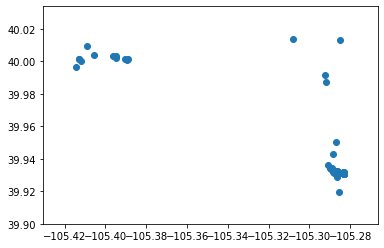

In [33]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = long
y = lat

plt.scatter(x, y)
plt.show()

In [34]:
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd

In [35]:
# I want to create a trial database for this data to be saved in.
# Define a database name 
# Set your postgres username
dbname = 'climbing_boulderco'
username = 'nicholasgriffin' # change this to your username

In [36]:
## 'engine' is a connection to a database
## Here, we're using postgres, but sqlalchemy can connect to other things too.
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
print(engine.url)

postgres://nicholasgriffin@localhost/climbing_boulderco


In [38]:
## create a database (if it doesn't exist)
if not database_exists(engine.url):
    create_database(engine.url)
print(database_exists(engine.url))

True


In [39]:
response2 = requests.get("https://www.mountainproject.com/data/get-routes-for-lat-lon?lat=34.02&lon=-116.16&maxDistance=10&minDiff=V1&maxDiff=V1&key=200588892-9fbd8573f0fe567a7983d3ab5ae62924")
print(response2)

<Response [200]>


In [40]:
print(response2.json())

{'routes': [{'id': 106048286, 'name': 'False Hueco', 'type': 'Boulder', 'rating': 'V1', 'stars': 3.6, 'starVotes': 128, 'pitches': '', 'location': ['California', 'Joshua Tree National Park', '*Joshua Tree Bouldering*', 'Outback Bouldering', 'False Hueco Boulder'], 'url': 'https://www.mountainproject.com/route/106048286/false-hueco', 'imgSqSmall': 'https://cdn-files.apstatic.com/climb/111237969_sqsmall_1494345362.jpg', 'imgSmall': 'https://cdn-files.apstatic.com/climb/111237969_small_1494345362.jpg', 'imgSmallMed': 'https://cdn-files.apstatic.com/climb/111237969_smallMed_1494345362.jpg', 'imgMedium': 'https://cdn-files.apstatic.com/climb/111237969_medium_1494345362.jpg', 'longitude': -116.2664, 'latitude': 34.0938}, {'id': 105901228, 'name': 'Turtle Face, Left', 'type': 'Boulder', 'rating': 'V1', 'stars': 3.7, 'starVotes': 45, 'pitches': '', 'location': ['California', 'Joshua Tree National Park', '*Joshua Tree Bouldering*', 'Real Hidden Valley Bouldering', 'Turtle Rock Circuit', 'Wedge 

In [34]:
import json

def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent = 4)
    print(text)
    
jprint(response2.json())

NameError: name 'response2' is not defined

In [43]:
routes2 = response2.json()['routes']
jprint(routes2)

[
    {
        "id": 106048286,
        "imgMedium": "https://cdn-files.apstatic.com/climb/111237969_medium_1494345362.jpg",
        "imgSmall": "https://cdn-files.apstatic.com/climb/111237969_small_1494345362.jpg",
        "imgSmallMed": "https://cdn-files.apstatic.com/climb/111237969_smallMed_1494345362.jpg",
        "imgSqSmall": "https://cdn-files.apstatic.com/climb/111237969_sqsmall_1494345362.jpg",
        "latitude": 34.0938,
        "location": [
            "California",
            "Joshua Tree National Park",
            "*Joshua Tree Bouldering*",
            "Outback Bouldering",
            "False Hueco Boulder"
        ],
        "longitude": -116.2664,
        "name": "False Hueco",
        "pitches": "",
        "rating": "V1",
        "starVotes": 128,
        "stars": 3.6,
        "type": "Boulder",
        "url": "https://www.mountainproject.com/route/106048286/false-hueco"
    },
    {
        "id": 105901228,
        "imgMedium": "https://cdn-files.apstatic.com/c

In [44]:
lat = [] # finding the range of latitudes

for i in routes2:
    lati = i['latitude']
    lat.append(lati)
    
print(lat)
print()

long = [] # finding the range of longitudes

for i in routes2:
    longi = i['longitude']
    long.append(longi)
    
print(long)

[34.0938, 34.0099, 33.9842, 34.0184, 34.0142, 33.9902, 34.0148, 34.0112, 34.0252, 34.0181, 34.0148, 34.0143, 33.983, 34.0174, 34.0204, 34.0186, 34.0184, 34.0263, 34.0402, 34.0003, 33.9893, 34.0204, 34.0182, 34.0926, 33.9962, 34.0284, 33.9893, 34.0204, 34.0626, 34.0249, 34.0025, 33.9942, 34.0752, 33.9962, 34.0229, 33.9664, 34.0178, 34.0942, 34.024, 34.0933, 34.0028, 34.0127, 34.0204, 33.954, 33.9976, 34.0942, 33.9863, 34.0263, 34.0249, 34.014]

[-116.2664, -116.1687, -116.1526, -116.1636, -116.1581, -116.1618, -116.1654, -116.1672, -116.1595, -116.1698, -116.1654, -116.1583, -116.1545, -116.1632, -116.1656, -116.1636, -116.1636, -116.1415, -116.1978, -116.1218, -116.1634, -116.1656, -116.1635, -116.154, -116.15, -116.1454, -116.1634, -116.1656, -116.2263, -116.1591, -116.1498, -116.143, -116.242, -116.15, -116.1641, -116.0872, -116.1723, -116.1545, -116.1772, -116.2644, -116.1504, -116.1684, -116.1656, -116.087, -116.1542, -116.1545, -116.1602, -116.1415, -116.1804, -116.1544]


In [45]:
response3 = requests.get("https://www.mountainproject.com/data/get-routes-for-lat-lon?lat=34.02&lon=-116.16&maxDistance=10&minDiff=V3&maxDiff=V3&key=200588892-9fbd8573f0fe567a7983d3ab5ae62924")
print(response3)

<Response [200]>


In [46]:
jprint(response3.json())

{
    "routes": [
        {
            "id": 105722755,
            "imgMedium": "https://cdn-files.apstatic.com/climb/106344662_medium_1494099951.jpg",
            "imgSmall": "https://cdn-files.apstatic.com/climb/106344662_small_1494099951.jpg",
            "imgSmallMed": "https://cdn-files.apstatic.com/climb/106344662_smallMed_1494099951.jpg",
            "imgSqSmall": "https://cdn-files.apstatic.com/climb/106344662_sqsmall_1494099951.jpg",
            "latitude": 33.9534,
            "location": [
                "California",
                "Joshua Tree National Park",
                "*Joshua Tree Bouldering*",
                "Geology Tour Road Bouldering",
                "Western Belt",
                "Slash Boulder"
            ],
            "longitude": -116.087,
            "name": "Slashface",
            "pitches": "",
            "rating": "V3 R",
            "starVotes": 79,
            "stars": 4.9,
            "type": "Boulder",
            "url": "https://www.mou

In [47]:
routes3 = response3.json()['routes']
jprint(routes3)

[
    {
        "id": 105722755,
        "imgMedium": "https://cdn-files.apstatic.com/climb/106344662_medium_1494099951.jpg",
        "imgSmall": "https://cdn-files.apstatic.com/climb/106344662_small_1494099951.jpg",
        "imgSmallMed": "https://cdn-files.apstatic.com/climb/106344662_smallMed_1494099951.jpg",
        "imgSqSmall": "https://cdn-files.apstatic.com/climb/106344662_sqsmall_1494099951.jpg",
        "latitude": 33.9534,
        "location": [
            "California",
            "Joshua Tree National Park",
            "*Joshua Tree Bouldering*",
            "Geology Tour Road Bouldering",
            "Western Belt",
            "Slash Boulder"
        ],
        "longitude": -116.087,
        "name": "Slashface",
        "pitches": "",
        "rating": "V3 R",
        "starVotes": 79,
        "stars": 4.9,
        "type": "Boulder",
        "url": "https://www.mountainproject.com/route/105722755/slashface"
    },
    {
        "id": 105722350,
        "imgMedium": "http

In [53]:
latV3 = [] # finding the range of latitudes

for i in routes3:
    lati = i['latitude']
    latV3.append(lati)
    
print(latV3)
print()

longV3 = [] # finding the range of longitudes

for i in routes3:
    longi = i['longitude']
    longV3.append(longi)
    
print(longV3)


[33.9534, 34.028, 34.0148, 34.0202, 34.0202, 34.0143, 34.0752, 34.0181, 34.0194, 34.011, 34.011, 33.9893, 34.0148, 33.9979, 33.9978, 34.0202, 34.0182, 34.0225, 34.0261, 34.0249, 34.0148, 34.0101, 34.0192, 34.0441, 34.0944, 34.0181, 34.0184, 34.0148, 34.0285, 34.0202, 34.0202, 34.0184, 34.0038, 34.0143, 33.983, 34.0135, 34.0626, 34.0694, 34.0143, 34.0148, 34.0284, 34.0944, 34.0402, 33.998, 33.9534, 33.9896, 34.0241, 34.0626, 34.0121, 33.994]

[-116.087, -116.1446, -116.1654, -116.165, -116.165, -116.1583, -116.242, -116.1698, -116.1629, -116.1661, -116.1661, -116.1634, -116.1654, -116.1534, -116.1536, -116.165, -116.1635, -116.1641, -116.1584, -116.1804, -116.1654, -116.1687, -116.1629, -116.1061, -116.1561, -116.1698, -116.1636, -116.1654, -116.1451, -116.165, -116.165, -116.1636, -116.1493, -116.1711, -116.1545, -116.1544, -116.2263, -116.092, -116.1583, -116.1654, -116.1589, -116.1561, -116.1978, -116.1535, -116.087, -116.1632, -116.1547, -116.2263, -116.1773, -116.1425]


In [60]:
response4 = requests.get("https://www.mountainproject.com/data/get-routes-for-lat-lon?lat=34.02&lon=-116.16&maxDistance=10&minDiff=V7&maxDiff=V7&key=200588892-9fbd8573f0fe567a7983d3ab5ae62924")
print(response3)

<Response [200]>


In [61]:
routes4 = response4.json()['routes']
jprint(routes4)

[
    {
        "id": 117537429,
        "imgMedium": "",
        "imgSmall": "",
        "imgSmallMed": "",
        "imgSqSmall": "",
        "latitude": 33.948,
        "location": [
            "California",
            "Joshua Tree National Park",
            "*Joshua Tree Bouldering*",
            "Geology Tour Road Bouldering",
            "Virgin Islands Area",
            "The Volcano Area",
            "Volcano Boulder Area",
            "The Peanut boulder"
        ],
        "longitude": -116.0752,
        "name": "The Peanut",
        "pitches": "",
        "rating": "V7 R",
        "starVotes": 1,
        "stars": 5,
        "type": "Boulder",
        "url": "https://www.mountainproject.com/route/117537429/the-peanut"
    },
    {
        "id": 108854273,
        "imgMedium": "https://cdn-files.apstatic.com/climb/108854285_medium_1494298076.jpg",
        "imgSmall": "https://cdn-files.apstatic.com/climb/108854285_small_1494298076.jpg",
        "imgSmallMed": "https://cdn-f

In [63]:
latV7 = [] # finding the range of latitudes

for i in routes4:
    lati = i['latitude']
    latV7.append(lati)
    
print(latV7)
print()

longV7 = [] # finding the range of longitudes

for i in routes4:
    longi = i['longitude']
    longV7.append(longi)
    
print(longV7)

[33.948, 34.0259, 33.983, 34.0317, 34.0188, 33.959, 33.983, 34.0284, 34.047]

[-116.0752, -116.1595, -116.1545, -116.1499, -116.1626, -116.0825, -116.1545, -116.1589, -116.1832]


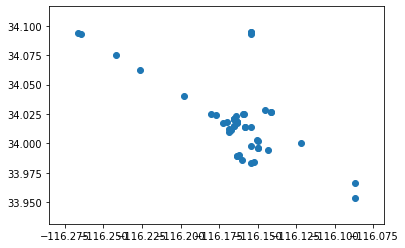

In [49]:
import numpy as np
import matplotlib.pyplot as plt

N = len(lat)
x = long
y = lat

plt.scatter(x, y)
plt.show()

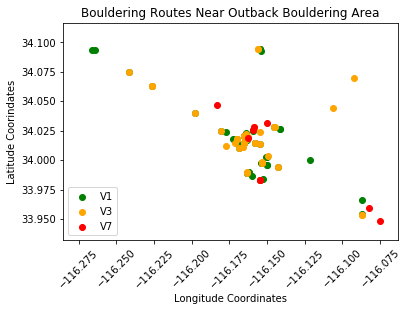

In [72]:
import numpy as np
import matplotlib.pyplot as plt

N = len(latV3)
x = long
y = lat
xv3 = longV3
yv3 = latV3
xv7 = longV7
yv7 = latV7

plt.scatter(x, y, color="green",label="V1")
plt.scatter(xv3, yv3, color="orange",label="V3")
plt.scatter(xv7, yv7, color="red",label="V7")
plt.xlabel("Longitude Coordinates")
plt.ylabel("Latitude Coorindates")
plt.title("Bouldering Routes Near Outback Bouldering Area")
plt.xticks(rotation=45)
plt.legend(loc='lower left')
plt.show()

In [54]:
len(lat)

50

In [55]:
len(latV3)

50

In [42]:
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd

In [41]:
# Define a database name (we're using a dataset on births, so we'll call it birth_db)
# Set your postgres username
dbname = 'jtnp_boulders'
username = 'nicholasgriffin' # change this to your username

In [42]:
## 'engine' is a connection to a database
## Here, we're using postgres, but sqlalchemy can connect to other things too.
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
print(engine.url)

postgres://nicholasgriffin@localhost/jtnp_boulders


In [43]:
## create a database (if it doesn't exist)
if not database_exists(engine.url):
    create_database(engine.url)
print(database_exists(engine.url))

True


In [40]:
# Define a database name (we're using a dataset on births, so we'll call it birth_db)
# Set your postgres username
dbname = 'climbing_boulderco'
username = 'nicholasgriffin' # change this to your username

## 'engine' is a connection to a database
## Here, we're using postgres, but sqlalchemy can connect to other things too.
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
print(engine.url)

postgres://nicholasgriffin@localhost/climbing_boulderco


In [ ]:
#AWS Account number :716854302764 


In [47]:
response4 = requests.get("https://www.mountainproject.com/data/get-routes-for-lat-lon?lat=34.02&lon=-116.16&maxDistance=50&maxResults=500&minDiff=V3&maxDiff=V17&key=200588892-9fbd8573f0fe567a7983d3ab5ae62924")
print(response4)

<Response [200]>


In [48]:
import json

def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent = 4)
    print(text)
    
jprint(response4.json())

{
    "routes": [
        {
            "id": 105725464,
            "imgMedium": "https://cdn-files.apstatic.com/climb/110869832_medium_1494356380.jpg",
            "imgSmall": "https://cdn-files.apstatic.com/climb/110869832_small_1494356380.jpg",
            "imgSmallMed": "https://cdn-files.apstatic.com/climb/110869832_smallMed_1494356380.jpg",
            "imgSqSmall": "https://cdn-files.apstatic.com/climb/110869832_sqsmall_1494356380.jpg",
            "latitude": 34.0148,
            "location": [
                "California",
                "Joshua Tree National Park",
                "*Joshua Tree Bouldering*",
                "Roadside Rocks Bouldering",
                "JBMF Boulders",
                "JBMF Boulder"
            ],
            "longitude": -116.1654,
            "name": "JBMFP",
            "pitches": "",
            "rating": "V5",
            "starVotes": 124,
            "stars": 4.9,
            "type": "Boulder",
            "url": "https://www.mountainpr

In [49]:
routes4 = response4.json()['routes']
jprint(routes4)

[
    {
        "id": 105725464,
        "imgMedium": "https://cdn-files.apstatic.com/climb/110869832_medium_1494356380.jpg",
        "imgSmall": "https://cdn-files.apstatic.com/climb/110869832_small_1494356380.jpg",
        "imgSmallMed": "https://cdn-files.apstatic.com/climb/110869832_smallMed_1494356380.jpg",
        "imgSqSmall": "https://cdn-files.apstatic.com/climb/110869832_sqsmall_1494356380.jpg",
        "latitude": 34.0148,
        "location": [
            "California",
            "Joshua Tree National Park",
            "*Joshua Tree Bouldering*",
            "Roadside Rocks Bouldering",
            "JBMF Boulders",
            "JBMF Boulder"
        ],
        "longitude": -116.1654,
        "name": "JBMFP",
        "pitches": "",
        "rating": "V5",
        "starVotes": 124,
        "stars": 4.9,
        "type": "Boulder",
        "url": "https://www.mountainproject.com/route/105725464/jbmfp"
    },
    {
        "id": 105722992,
        "imgMedium": "https://cdn-fil

In [37]:
latV7 = [] # finding the range of latitudes

for i in routes4:
    lati = i['latitude']
    latV7.append(lati)
    
print(latV7)
print()

longV7 = [] # finding the range of longitudes

for i in routes4:
    longi = i['longitude']
    longV7.append(longi)
    
print(longV7)

[34.0148, 34.0154, 33.9534, 34.028, 34.0184, 33.9942, 34.0217, 34.0148, 34.0202, 34.0202, 34.0202, 34.0184, 33.9992, 34.0143, 34.0285, 34.0278, 33.9978, 34.0038, 33.9971, 33.9893, 34.0185, 34.0626, 34.0694, 34.033, 34.0259, 34.0194, 34.0143, 34.0255, 34.0169, 33.9942, 34.0029, 33.9877, 34.0202, 34.0317, 34.0184, 34.0143, 33.9552, 34.0694, 34.0004, 33.9664, 34.0752, 33.948, 34.0752, 34.0259, 34.0181, 33.983, 33.9979, 33.9966, 34.0694, 34.0694, 33.956, 33.9423, 34.0097, 34.0194, 34.033, 34.0259, 34.011, 34.011, 34.0148, 34.0261, 34.0285, 34.0694, 34.0202, 34.0101, 34.0317, 34.0174, 33.9893, 34.0126, 34.0148, 33.9979, 34.0188, 33.983, 34.0202, 34.0143, 34.0121, 34.0752, 33.9978, 34.0153, 34.0285, 34.0202, 34.0182, 34.0202, 33.9942, 34.0148, 34.0135, 34.033, 34.0896, 34.0148, 34.0225, 33.983, 34.0261, 33.9896, 34.0808, 34.0249, 33.9962, 34.0181, 34.0202, 34.0148, 34.0101, 33.983, 34.0217, 34.0184, 34.0202, 33.9964, 34.0263, 33.959, 34.0202, 33.9976, 34.0192, 33.9962, 34.0407, 34.0441, 34.0

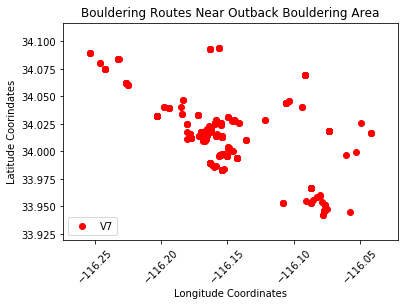

In [50]:
import numpy as np
import matplotlib.pyplot as plt

N = len(latV7)
#x = long
#y = lat
#xv3 = longV3
#yv3 = latV3
xv7 = longV7
yv7 = latV7

#plt.scatter(x, y, color="green",label="V1")
#plt.scatter(xv3, yv3, color="orange",label="V3")
plt.scatter(xv7, yv7, color="red",label="V7")
plt.xlabel("Longitude Coordinates")
plt.ylabel("Latitude Coorindates")
plt.title("Bouldering Routes Near Outback Bouldering Area")
plt.xticks(rotation=45)
plt.legend(loc='lower left')
plt.show()

In [51]:
print(yv7)
len(yv7)

[34.0148, 34.0154, 33.9534, 34.028, 34.0184, 33.9942, 34.0217, 34.0148, 34.0202, 34.0202, 34.0202, 34.0184, 33.9992, 34.0143, 34.0285, 34.0278, 33.9978, 34.0038, 33.9971, 33.9893, 34.0185, 34.0626, 34.0694, 34.033, 34.0259, 34.0194, 34.0143, 34.0255, 34.0169, 33.9942, 34.0029, 33.9877, 34.0202, 34.0317, 34.0184, 34.0143, 33.9552, 34.0694, 34.0004, 33.9664, 34.0752, 33.948, 34.0752, 34.0259, 34.0181, 33.983, 33.9979, 33.9966, 34.0694, 34.0694, 33.956, 33.9423, 34.0097, 34.0194, 34.033, 34.0259, 34.011, 34.011, 34.0148, 34.0261, 34.0285, 34.0694, 34.0202, 34.0101, 34.0317, 34.0174, 33.9893, 34.0126, 34.0148, 33.9979, 34.0188, 33.983, 34.0202, 34.0143, 34.0121, 34.0752, 33.9978, 34.0153, 34.0285, 34.0202, 34.0182, 34.0202, 33.9942, 34.0148, 34.0135, 34.033, 34.0896, 34.0148, 34.0225, 33.983, 34.0261, 33.9896, 34.0808, 34.0249, 33.9962, 34.0181, 34.0202, 34.0148, 34.0101, 33.983, 34.0217, 34.0184, 34.0202, 33.9964, 34.0263, 33.959, 34.0202, 33.9976, 34.0192, 33.9962, 34.0407, 34.0441, 34.0

347

In [45]:
routez = response4.json()['routes']
#jprint(routes)
json.dumps(routez)

'[{"id": 105725464, "name": "JBMFP", "type": "Boulder", "rating": "V5", "stars": 4.9, "starVotes": 124, "pitches": "", "location": ["California", "Joshua Tree National Park", "*Joshua Tree Bouldering*", "Roadside Rocks Bouldering", "JBMF Boulders", "JBMF Boulder"], "url": "https://www.mountainproject.com/route/105725464/jbmfp", "imgSqSmall": "https://cdn-files.apstatic.com/climb/110869832_sqsmall_1494356380.jpg", "imgSmall": "https://cdn-files.apstatic.com/climb/110869832_small_1494356380.jpg", "imgSmallMed": "https://cdn-files.apstatic.com/climb/110869832_smallMed_1494356380.jpg", "imgMedium": "https://cdn-files.apstatic.com/climb/110869832_medium_1494356380.jpg", "longitude": -116.1654, "latitude": 34.0148}, {"id": 105722992, "name": "Pigpen", "type": "Boulder", "rating": "V4", "stars": 4.9, "starVotes": 96, "pitches": "", "location": ["California", "Joshua Tree National Park", "*Joshua Tree Bouldering*", "Hidden Valley Campground Bouldering", "Manx/Asteroid Belt Circuit", "Manx Boul

In [57]:
df1=DataFrame(routez)
df1

NameError: name 'routez' is not defined

In [53]:
# Define a database name (we're using a dataset on births, so we'll call it birth_db)
# Set your postgres username
dbname = 'jtnp_boulders'
username = 'nicholasgriffin' # change this to your username

In [54]:
## 'engine' is a connection to a database
## Here, we're using postgres, but sqlalchemy can connect to other things too.
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
print(engine.url)


postgres://nicholasgriffin@localhost/jtnp_boulders


In [55]:
## create a database (if it doesn't exist)
if not database_exists(engine.url):
    create_database(engine.url)
print(database_exists(engine.url))

True


In [56]:
df1.to_sql('jtnp_routes_v1', engine, if_exists='replace')

In [44]:
# Connect to make queries using psycopg2
con = None
con = psycopg2.connect(database = dbname, user = username)

In [56]:
# query:
sql_query = """
SELECT * FROM jtnp_routes_v1 WHERE "starVotes" = 21;
"""

jtnp_from_sql = pd.read_sql_query(sql_query,con)
jtnp_from_sql.head()

index         id                                               name  \
0     19  105723292                                      All Washed Up   
1     20  106934624                                       Scatterbrain   
2     68  105725446                                  Lechlinski Corner   
3      9  112443810                              Falser Hueco Traverse   
4     13  107697696  All Seeing Eye of the Great Architect of the U...   

      type rating  stars  starVotes pitches  \
0  Boulder     V6    4.8         21           
1  Boulder     V6    4.6         21           
2  Boulder     V3    3.5         21           
3  Boulder     V2    4.1         21           
4  Boulder     V2    4.0         21           

                                            location  \
0  {California,"Joshua Tree National Park","*Josh...   
1  {California,"Joshua Tree National Park","*Josh...   
2  {California,"Joshua Tree National Park","*Josh...   
3  {California,"Joshua Tree National Park","*Josh...   
4  {California,"San Jacinto Mountains","The Tramw...   

                                                 url  \
0  https://www.mountainproject.com/route/10572329...   
1  https://www.mountainproject.com/route/10693462...   
2  https://www.mountainproject.com/route/10572544...   
3  https://www.mountainproject.com/route/11244381...   
4  https://www.mountainproject.com/route/10769769...   

                                          imgSqSmall  \
0  https://cdn-files.apstatic.com/climb/106348787...   
1  https://cdn-files.apstatic.com/climb/108373123...   
2  https://cdn-files.apstatic.com/climb/106115396...   
3  https://cdn-files.apstatic.com/climb/112452401...   
4  https://cdn-files.apstatic.com/climb/107697822...   

                                            imgSmall  \
0  https://cdn-files.apstatic.com/climb/106348787...   
1  https://cdn-files.apstatic.com/climb/108373123...   
2  https://cdn-files.apstatic.com/climb/106115396...   
3  https://cdn-files.apstatic.com/climb/112452401...   
4  https://cdn-files.apstatic.com/climb/107697822...   

                                         imgSmallMed  \
0  https://cdn-files.apstatic.com/climb/106348787...   
1  https://cdn-files.apstatic.com/climb/108373123...   
2  https://cdn-files.apstatic.com/climb/106115396...   
3  https://cdn-files.apstatic.com/climb/112452401...   
4  https://cdn-files.apstatic.com/climb/107697822...   

                                           imgMedium  longitude  latitude  
0  https://cdn-files.apstatic.com/climb/106348787...  -116.1634   33.9893  
1  https://cdn-files.apstatic.com/climb/108373123...  -116.1636   34.0185  
2  https://cdn-files.apstatic.com/climb/106115396...  -116.1654   34.0148  
3  https://cdn-files.apstatic.com/climb/112452401...  -116.1650   34.0202  
4  https://cdn-files.apstatic.com/climb/107697822...  -116.6463   33.8181

In [65]:
response4 = requests.get("https://www.mountainproject.com/data/get-routes-for-lat-lon?lat=34.02&lon=-116.16&maxDistance=50&maxResults=500&minDiff=V2&maxDiff=V2&key=200588892-9fbd8573f0fe567a7983d3ab5ae62924")
print(response4)

<Response [200]>


In [66]:
# Here, I jumped forward one level up the tree in the JSON file to make it easier to subset data components.

routes4 = response4.json()['routes']
jprint(routes4)

[
    {
        "id": 105722593,
        "imgMedium": "https://cdn-files.apstatic.com/climb/114202430_medium_1522344758.jpg",
        "imgSmall": "https://cdn-files.apstatic.com/climb/114202430_small_1522344758.jpg",
        "imgSmallMed": "https://cdn-files.apstatic.com/climb/114202430_smallMed_1522344758.jpg",
        "imgSqSmall": "https://cdn-files.apstatic.com/climb/114202430_sqsmall_1522344758.jpg",
        "latitude": 33.719,
        "location": [
            "California",
            "Joshua Tree National Park",
            "*Joshua Tree Bouldering*",
            "Outback Bouldering",
            "White Rastafarian Boulder"
        ],
        "longitude": -116.3813,
        "name": "White Rastafarian",
        "pitches": "",
        "rating": "V2 R",
        "starVotes": 148,
        "stars": 4.9,
        "type": "Boulder",
        "url": "https://www.mountainproject.com/route/105722593/white-rastafarian"
    },
    {
        "id": 106039374,
        "imgMedium": "https://cdn-f

In [67]:
latV8 = [] # finding the range of latitudes

for i in routes4:
    lati = i['latitude']
    latV8.append(lati)
    
print(latV8)
len(latV8)

[33.719, 33.9871, 34.0006, 34.0143, 33.8124, 34.0252, 33.8134, 34.0204, 33.8139, 34.0202, 33.8266, 33.8094, 33.8151, 33.8181, 34.0159, 34.0099, 33.8127, 34.0538, 34.0136, 33.8146, 33.907, 33.9962, 33.8169, 33.8174, 33.8172, 34.011, 33.8281, 33.9893, 33.8281, 33.9964, 33.8203, 33.8145, 34.0407, 34.0177, 34.0441, 34.0752, 34.0148, 33.8266, 33.8226, 33.9454, 33.7703, 33.8145, 33.8281, 33.8284, 34.0284, 33.7437, 34.0626, 33.8124, 33.8041, 34.0143, 34.0261, 34.0241, 33.8228, 34.2732, 33.7349, 34.0174, 34.0202, 33.9962, 34.0285, 34.0184, 33.8158, 33.8216, 33.7437, 33.8259, 33.7426, 33.8166, 34.0942, 33.8137, 33.8127, 34.0182, 33.7917, 33.8382, 34.0462, 33.8172, 34.2753, 33.8147, 34.2732, 33.9893, 34.0148, 34.019, 34.0284, 34.0626, 33.8127, 34.0281, 33.8322, 33.8131, 34.0143, 33.9893, 33.983, 33.998, 33.8164, 33.8126, 33.8269, 33.8379, 33.9893, 33.8124, 34.0143, 33.8259, 34.0135, 33.9842, 34.011, 34.0104, 34.0124, 33.9964, 34.0135, 34.0121, 33.983, 33.7437, 34.0104, 33.9893, 34.0174, 33.8159,

225

In [68]:
# FOR PREPARING TO SEND TO A SQL DATABASE
# First step - take the json file and use the .dumps command to prepare to put the data into a data frame.

routez2 = response4.json()['routes']
#jprint(routes)
json.dumps(routez2)

'[{"id": 105722593, "name": "White Rastafarian", "type": "Boulder", "rating": "V2 R", "stars": 4.9, "starVotes": 148, "pitches": "", "location": ["California", "Joshua Tree National Park", "*Joshua Tree Bouldering*", "Outback Bouldering", "White Rastafarian Boulder"], "url": "https://www.mountainproject.com/route/105722593/white-rastafarian", "imgSqSmall": "https://cdn-files.apstatic.com/climb/114202430_sqsmall_1522344758.jpg", "imgSmall": "https://cdn-files.apstatic.com/climb/114202430_small_1522344758.jpg", "imgSmallMed": "https://cdn-files.apstatic.com/climb/114202430_smallMed_1522344758.jpg", "imgMedium": "https://cdn-files.apstatic.com/climb/114202430_medium_1522344758.jpg", "longitude": -116.3813, "latitude": 33.719}, {"id": 106039374, "name": "Fry Problem", "type": "Boulder", "rating": "V2", "stars": 4.7, "starVotes": 85, "pitches": "", "location": ["California", "Joshua Tree National Park", "*Joshua Tree Bouldering*", "Stonehenge and Fry Boulders", "Fry Boulders", "Fry Boulder"

In [70]:
# Defining the data frame

df2=DataFrame(routez2)
df2

id               name     type rating  stars  starVotes pitches  \
0    105722593  White Rastafarian  Boulder   V2 R    4.9        148           
1    106039374        Fry Problem  Boulder     V2    4.7         85           
2    105724441          The Chube  Boulder     V2    4.3        215           
3    105908403  The Boxer Problem  Boulder     V2    3.4         89           
4    106228982     The Terminator  Boulder     V2    3.3         68           
..         ...                ...      ...    ...    ...        ...     ...   
220  106684487       Dirk Diggler  Boulder     V2    0.0          0           
221  106683697        Yabo Nation  Boulder     V2    0.0          0           
222  107088126       Face Prob  2  Boulder     V2    0.0          0           
223  106688602          The Labia  Boulder     V2    0.0          0           
224  106684428               Punk  Boulder   V2 R    0.0          0           

                                              location  \
0    [California, Joshua Tree National Park, *Joshu...   
1    [California, Joshua Tree National Park, *Joshu...   
2    [California, Joshua Tree National Park, *Joshu...   
3    [California, Joshua Tree National Park, *Joshu...   
4    [California, San Jacinto Mountains, The Tramwa...   
..                                                 ...   
220  [California, Joshua Tree National Park, *Joshu...   
221  [California, Joshua Tree National Park, *Joshu...   
222  [California, Joshua Tree National Park, *Joshu...   
223  [California, Joshua Tree National Park, *Joshu...   
224  [California, Joshua Tree National Park, *Joshu...   

                                                   url  \
0    https://www.mountainproject.com/route/10572259...   
1    https://www.mountainproject.com/route/10603937...   
2    https://www.mountainproject.com/route/10572444...   
3    https://www.mountainproject.com/route/10590840...   
4    https://www.mountainproject.com/route/10622898...   
..                                                 ...   
220  https://www.mountainproject.com/route/10668448...   
221  https://www.mountainproject.com/route/10668369...   
222  https://www.mountainproject.com/route/10708812...   
223  https://www.mountainproject.com/route/10668860...   
224  https://www.mountainproject.com/route/10668442...   

                                            imgSqSmall  \
0    https://cdn-files.apstatic.com/climb/114202430...   
1    https://cdn-files.apstatic.com/climb/108620541...   
2    https://cdn-files.apstatic.com/climb/116503978...   
3    https://cdn-files.apstatic.com/climb/107680605...   
4    https://cdn-files.apstatic.com/climb/111841257...   
..                                                 ...   
220                                                      
221  https://cdn-files.apstatic.com/climb/106683702...   
222                                                      
223  https://cdn-files.apstatic.com/climb/106688606...   
224  https://cdn-files.apstatic.com/climb/106690803...   

                                              imgSmall  \
0    https://cdn-files.apstatic.com/climb/114202430...   
1    https://cdn-files.apstatic.com/climb/108620541...   
2    https://cdn-files.apstatic.com/climb/116503978...   
3    https://cdn-files.apstatic.com/climb/107680605...   
4    https://cdn-files.apstatic.com/climb/111841257...   
..                                                 ...   
220                                                      
221  https://cdn-files.apstatic.com/climb/106683702...   
222                                                      
223  https://cdn-files.apstatic.com/climb/106688606...   
224  https://cdn-files.apstatic.com/climb/106690803...   

                                           imgSmallMed  \
0    https://cdn-files.apstatic.com/climb/114202430...   
1    https://cdn-files.apstatic.com/climb/108620541...   
2    https://cdn-files.apstatic.com/climb/116503978...   
3    https://cdn-files.apstatic.com/climb/1

In [71]:
# Sending the data frame defined above to SQL.
# Within the parentheses: (name of data within the database, engine name[in this case, 'engine'], if_exists)
# The if_exists command has three options: 
# 'replace' means overwriting any data already in your chunk of saved data. For a brand new database, this option works.
# 'append' means adding additional data to what you have already saved, good for multiple API requests and adding more info to a database
# 'fail' means Raise a ValueError (THIS IS THE DEFAULT OPTION - YOU SHOULD CHOOSE 'REPLACE' OR 'APPEND')


df2.to_sql('jtnp_routes_v1', engine, if_exists='append')

In [76]:
# Running a SQL query from your saved data/database
# query:

sql_query = """
SELECT * FROM jtnp_routes_v1 WHERE rating='V2';
"""
# 
jtnp_from_sql = pd.read_sql_query(sql_query,con)
jtnp_from_sql.head()

index         id               name     type rating  stars  starVotes  \
0    220  106684487       Dirk Diggler  Boulder     V2    0.0          0   
1      1  106039374        Fry Problem  Boulder     V2    4.7         85   
2      2  105724441          The Chube  Boulder     V2    4.3        215   
3      3  105908403  The Boxer Problem  Boulder     V2    3.4         89   
4      4  106228982     The Terminator  Boulder     V2    3.3         68   

  pitches                                           location  \
0          {California,"Joshua Tree National Park","*Josh...   
1          {California,"Joshua Tree National Park","*Josh...   
2          {California,"Joshua Tree National Park","*Josh...   
3          {California,"Joshua Tree National Park","*Josh...   
4          {California,"San Jacinto Mountains","The Tramw...   

                                                 url  \
0  https://www.mountainproject.com/route/10668448...   
1  https://www.mountainproject.com/route/10603937...   
2  https://www.mountainproject.com/route/10572444...   
3  https://www.mountainproject.com/route/10590840...   
4  https://www.mountainproject.com/route/10622898...   

                                          imgSqSmall  \
0                                                      
1  https://cdn-files.apstatic.com/climb/108620541...   
2  https://cdn-files.apstatic.com/climb/116503978...   
3  https://cdn-files.apstatic.com/climb/107680605...   
4  https://cdn-files.apstatic.com/climb/111841257...   

                                            imgSmall  \
0                                                      
1  https://cdn-files.apstatic.com/climb/108620541...   
2  https://cdn-files.apstatic.com/climb/116503978...   
3  https://cdn-files.apstatic.com/climb/107680605...   
4  https://cdn-files.apstatic.com/climb/111841257...   

                                         imgSmallMed  \
0                                                      
1  https://cdn-files.apstatic.com/climb/108620541...   
2  https://cdn-files.apstatic.com/climb/116503978...   
3  https://cdn-files.apstatic.com/climb/107680605...   
4  https://cdn-files.apstatic.com/climb/111841257...   

                                           imgMedium  longitude  latitude  
0                                                     -116.1061   34.0441  
1  https://cdn-files.apstatic.com/climb/108620541...  -116.1589   33.9871  
2  https://cdn-files.apstatic.com/climb/116503978...  -116.1424   34.0006  
3  https://cdn-files.apstatic.com/climb/107680605...  -116.1583   34.0143  
4  https://cdn-files.apstatic.com/climb/111841257...  -116.6460   33.8124

In [74]:
response5 = requests.get("https://www.mountainproject.com/data/get-routes-for-lat-lon?lat=34.02&lon=-116.16&maxDistance=50&maxResults=500&minDiff=V1&maxDiff=V1&key=200588892-9fbd8573f0fe567a7983d3ab5ae62924")
print(response5)

<Response [200]>


In [77]:
# Here, I jumped forward one level up the tree in the JSON file to make it easier to subset data components.

routes5 = response5.json()['routes']
jprint(routes5)

[
    {
        "id": 106505709,
        "imgMedium": "https://cdn-files.apstatic.com/climb/107737193_medium_1494208097.jpg",
        "imgSmall": "https://cdn-files.apstatic.com/climb/107737193_small_1494208097.jpg",
        "imgSmallMed": "https://cdn-files.apstatic.com/climb/107737193_smallMed_1494208097.jpg",
        "imgSqSmall": "https://cdn-files.apstatic.com/climb/107737193_sqsmall_1494208097.jpg",
        "latitude": 33.8159,
        "location": [
            "California",
            "San Jacinto Mountains",
            "The Tramway",
            "Shangri-La Valley",
            "The Dance Floor",
            "Hueco Boulder"
        ],
        "longitude": -116.6491,
        "name": "Hueco Shuffle",
        "pitches": "",
        "rating": "V1",
        "starVotes": 100,
        "stars": 3.9,
        "type": "Boulder",
        "url": "https://www.mountainproject.com/route/106505709/hueco-shuffle"
    },
    {
        "id": 106048286,
        "imgMedium": "https://cdn-files.aps

In [79]:
latV7 = [] # finding the range of latitudes

for i in routes5:
    lati = i['latitude']
    latV7.append(lati)
    
print(latV7)
len(latV7)

[33.8159, 34.0938, 33.8219, 33.8637, 34.0099, 33.9842, 34.0184, 33.8381, 34.0142, 33.9902, 34.0148, 33.8135, 33.8159, 33.8269, 33.8041, 34.0112, 34.0252, 33.8146, 33.818, 34.0181, 34.0148, 33.8127, 34.0143, 33.8228, 33.983, 33.7437, 34.0174, 34.0204, 34.0186, 33.8125, 34.0184, 33.8183, 34.0263, 33.8131, 33.818, 34.0402, 34.0003, 33.8274, 33.9893, 33.7912, 34.2757, 33.7745, 33.7343, 33.8141, 33.8234, 33.8161, 33.8137, 33.8269, 34.0204, 34.0182, 34.0926, 33.8228, 33.8128, 33.9962, 34.2732, 34.0284, 33.8247, 33.9893, 33.8174, 34.0204, 34.0626, 34.0249, 33.8168, 33.8222, 34.0025, 33.9942, 33.8288, 34.2753, 33.8146, 33.8136, 34.0752, 33.9962, 34.0229, 33.7439, 33.8282, 33.9664, 33.8281, 33.7349, 34.0178, 34.0942, 34.024, 33.8145, 34.0933, 34.0028, 33.8269, 34.0127, 34.0204, 33.8134, 33.954, 33.8131, 33.9976, 33.9136, 33.818, 34.0942, 33.9863, 34.0263, 33.8247, 34.1356, 34.0249, 33.8166, 33.8259, 34.014, 33.8336, 34.0937, 34.0181, 34.143, 34.0167, 34.0441, 33.8382, 33.7431, 33.8125, 34.0403,

232

In [80]:
routez3 = response5.json()['routes']
#jprint(routes)
json.dumps(routez3)

'[{"id": 106505709, "name": "Hueco Shuffle", "type": "Boulder", "rating": "V1", "stars": 3.9, "starVotes": 100, "pitches": "", "location": ["California", "San Jacinto Mountains", "The Tramway", "Shangri-La Valley", "The Dance Floor", "Hueco Boulder"], "url": "https://www.mountainproject.com/route/106505709/hueco-shuffle", "imgSqSmall": "https://cdn-files.apstatic.com/climb/107737193_sqsmall_1494208097.jpg", "imgSmall": "https://cdn-files.apstatic.com/climb/107737193_small_1494208097.jpg", "imgSmallMed": "https://cdn-files.apstatic.com/climb/107737193_smallMed_1494208097.jpg", "imgMedium": "https://cdn-files.apstatic.com/climb/107737193_medium_1494208097.jpg", "longitude": -116.6491, "latitude": 33.8159}, {"id": 106048286, "name": "False Hueco", "type": "Boulder", "rating": "V1", "stars": 3.6, "starVotes": 128, "pitches": "", "location": ["California", "Joshua Tree National Park", "*Joshua Tree Bouldering*", "Outback Bouldering", "False Hueco Boulder"], "url": "https://www.mountainproje

In [81]:
df3=DataFrame(routez3)
df3

id               name     type rating  stars  starVotes pitches  \
0    106505709      Hueco Shuffle  Boulder     V1    3.9        100           
1    106048286        False Hueco  Boulder     V1    3.6        128           
2    109471684   Once Upon A Time  Boulder   V1 R    5.0         44           
3    108579255        Gym Problem  Boulder     V1    3.7         50           
4    105901228  Turtle Face, Left  Boulder     V1    3.7         45           
..         ...                ...      ...    ...    ...        ...     ...   
227  112009722         Unnamed V1  Boulder     V1    0.0          0           
228  109595303         Nerds Rope  Boulder     V1    0.0          0           
229  110335524      Unnamed Arete  Boulder     V1    0.0          0           
230  106684435    The Reacharound  Boulder   V1 R    0.0          0           
231  106684422              Swank  Boulder     V1    0.0          0           

                                              location  \
0    [California, San Jacinto Mountains, The Tramwa...   
1    [California, Joshua Tree National Park, *Joshu...   
2    [California, San Jacinto Mountains, Black Moun...   
3    [California, San Jacinto Mountains, Black Moun...   
4    [California, Joshua Tree National Park, *Joshu...   
..                                                 ...   
227  [California, San Jacinto Mountains, The Tramwa...   
228  [California, San Jacinto Mountains, The Tramwa...   
229  [California, San Jacinto Mountains, Black Moun...   
230  [California, Joshua Tree National Park, *Joshu...   
231  [California, Joshua Tree National Park, *Joshu...   

                                                   url  \
0    https://www.mountainproject.com/route/10650570...   
1    https://www.mountainproject.com/route/10604828...   
2    https://www.mountainproject.com/route/10947168...   
3    https://www.mountainproject.com/route/10857925...   
4    https://www.mountainproject.com/route/10590122...   
..                                                 ...   
227  https://www.mountainproject.com/route/11200972...   
228  https://www.mountainproject.com/route/10959530...   
229  https://www.mountainproject.com/route/11033552...   
230  https://www.mountainproject.com/route/10668443...   
231  https://www.mountainproject.com/route/10668442...   

                                            imgSqSmall  \
0    https://cdn-files.apstatic.com/climb/107737193...   
1    https://cdn-files.apstatic.com/climb/111237969...   
2    https://cdn-files.apstatic.com/climb/109379122...   
3    https://cdn-files.apstatic.com/climb/111990530...   
4    https://cdn-files.apstatic.com/climb/105901232...   
..                                                 ...   
227  https://cdn-files.apstatic.com/climb/112009717...   
228                                                      
229                                                      
230  https://cdn-files.apstatic.com/climb/106690806...   
231  https://cdn-files.apstatic.com/climb/106684425...   

                                              imgSmall  \
0    https://cdn-files.apstatic.com/climb/107737193...   
1    https://cdn-files.apstatic.com/climb/111237969...   
2    https://cdn-files.apstatic.com/climb/109379122...   
3    https://cdn-files.apstatic.com/climb/111990530...   
4    https://cdn-files.apstatic.com/climb/105901232...   
..                                                 ...   
227  https://cdn-files.apstatic.com/climb/112009717...   
228                                                      
229                                                      
230  https://cdn-files.apstatic.com/climb/106690806...   
231  https://cdn-files.apstatic.com/climb/106684425...   

                                           imgSmallMed  \
0    https://cdn-files.apstatic.com/climb/107737193...   
1    https://cdn-files.apstatic.com/climb/111237969...   
2    https://cdn-files.apstatic.com/climb/109379122...   
3    https://cdn-files.apstatic.com/climb/1

In [82]:
df3.to_sql('jtnp_routes_v1', engine, if_exists='append')

In [94]:
sql_query = """
SELECT * FROM jtnp_routes_v1 WHERE rating='V1 R';
"""
# 
jtnp_from_sql = pd.read_sql_query(sql_query,con)
jtnp_from_sql

index         id                                name     type rating  \
0      2  109471684                    Once Upon A Time  Boulder   V1 R   
1     11  107746032                  Sea of Tranquility  Boulder   V1 R   
2     15  106143002                   Act of Contrition  Boulder   V1 R   
3     16  106693819                       Coyote Corner  Boulder   V1 R   
4     58  107176674                           Problem B  Boulder   V1 R   
5    141  106743954  Blatant Disregard for Human Safety  Boulder   V1 R   
6    169  106486163                       March Madness  Boulder   V1 R   
7    200  112454337                            X Cracks  Boulder   V1 R   
8    203  106640251                      Cadillac Crack  Boulder   V1 R   
9    230  106684435                     The Reacharound  Boulder   V1 R   

   stars  starVotes pitches  \
0    5.0         44           
1    3.8         24           
2    4.6          5           
3    4.3         11           
4    3.5          4           
5    2.8          4           
6    2.3          3           
7    2.0          1           
8    2.0          1           
9    0.0          0           

                                            location  \
0  {California,"San Jacinto Mountains","Black Mou...   
1  {California,"San Jacinto Mountains","The Tramw...   
2  {California,"Joshua Tree National Park","*Josh...   
3  {California,"Joshua Tree National Park","*Josh...   
4  {California,"San Jacinto Mountains","The Tramw...   
5  {California,"Joshua Tree National Park","*Josh...   
6  {California,"San Jacinto Mountains","The Tramw...   
7  {California,"Joshua Tree National Park","*Josh...   
8  {California,"Joshua Tree National Park","*Josh...   
9  {California,"Joshua Tree National Park","*Josh...   

                                                 url  \
0  https://www.mountainproject.com/route/10947168...   
1  https://www.mountainproject.com/route/10774603...   
2  https://www.mountainproject.com/route/10614300...   
3  https://www.mountainproject.com/route/10669381...   
4  https://www.mountainproject.com/route/10717667...   
5  https://www.mountainproject.com/route/10674395...   
6  https://www.mountainproject.com/route/10648616...   
7  https://www.mountainproject.com/route/11245433...   
8  https://www.mountainproject.com/route/10664025...   
9  https://www.mountainproject.com/route/10668443...   

                                          imgSqSmall  \
0  https://cdn-files.apstatic.com/climb/109379122...   
1  https://cdn-files.apstatic.com/climb/115362549...   
2  https://cdn-files.apstatic.com/climb/106143024...   
3  https://cdn-files.apstatic.com/climb/111885733...   
4  https://cdn-files.apstatic.com/climb/107176729...   
5  https://cdn-files.apstatic.com/climb/106743991...   
6  https://cdn-files.apstatic.com/climb/106488283...   
7                                                      
8  https://cdn-files.apstatic.com/climb/106640268...   
9  https://cdn-files.apstatic.com/climb/106690806...   

                                            imgSmall  \
0  https://cdn-files.apstatic.com/climb/109379122...   
1  https://cdn-files.apstatic.com/climb/115362549...   
2  https://cdn-files.apstatic.com/climb/106143024...   
3  https://cdn-files.apstatic.com/climb/111885733...   
4  https://cdn-files.apstatic.com/climb/107176729...   
5  https://cdn-files.apstatic.com/climb/106743991...   
6  https://cdn-files.apstatic.com/climb/106488283...   
7                                                      
8  https://cdn-files.apstatic.com/climb/106640268...   
9  https://cdn-files.apstatic.com/climb/106690806...   

                                         imgSmallMed  \
0  https://cdn-files.apstatic.com/climb/109379122...   
1  https://cdn-files.apstatic.com/climb/115362549...   
2  https://cdn-files.apstatic.com/climb/106143024...   
3  https://cdn-files.apstatic.com/climb/111885733...   
4  https://cdn-files.apstatic.com/climb/107176729...   
5  https://cdn-files.apstatic.c

In [116]:
response6 = requests.get("https://www.mountainproject.com/data/get-routes-for-lat-lon?lat=34.02&lon=-116.16&maxDistance=50&maxResults=500&minDiff=V-easy&maxDiff=V-easy&key=200588892-9fbd8573f0fe567a7983d3ab5ae62924")
print(response6)

<Response [200]>


In [117]:
routes6 = response6.json()['routes']
jprint(routes6)

[
    {
        "id": 106649376,
        "imgMedium": "https://cdn-files.apstatic.com/climb/106649417_medium_1494128724.jpg",
        "imgSmall": "https://cdn-files.apstatic.com/climb/106649417_small_1494128724.jpg",
        "imgSmallMed": "https://cdn-files.apstatic.com/climb/106649417_smallMed_1494128724.jpg",
        "imgSqSmall": "https://cdn-files.apstatic.com/climb/106649417_sqsmall_1494128724.jpg",
        "latitude": 34.1431,
        "location": [
            "California",
            "Joshua Tree National Park",
            "*Joshua Tree Bouldering*",
            "Planet X Bouldering",
            "The Hang",
            "Illicit Sweetie Boulder"
        ],
        "longitude": -116.3132,
        "name": "Sweetie Pie",
        "pitches": "",
        "rating": "V-easy",
        "starVotes": 73,
        "stars": 3.7,
        "type": "Boulder",
        "url": "https://www.mountainproject.com/route/106649376/sweetie-pie"
    },
    {
        "id": 106051737,
        "imgMedium": "

In [118]:
latV7 = [] # finding the range of latitudes

for i in routes6:
    lati = i['latitude']
    latV7.append(lati)
    
print(latV7)
len(latV7)

[34.1431, 34.0141, 34.143, 33.9896, 34.0204, 34.02, 34.0204, 34.0281, 33.8172, 34.0148, 34.0284, 34.02, 34.0163, 34.0127, 34.0202, 34.0104, 34.0184, 33.9871, 33.9964, 34.0143, 33.9893, 34.0163, 33.8135, 34.0202, 34.011, 33.9862, 33.8281, 34.0602, 34.0183, 34.0284, 33.8128, 34.0028, 34.0099, 34.011, 34.0004, 34.0003, 34.0104, 34.0163, 33.8236, 34.0135, 34.0099, 33.9841, 34.0163, 34.0163, 33.9962, 34.0402, 33.9893, 33.8172, 33.7437, 34.0249, 33.7439, 33.8282, 34.0202, 34.0135, 34.011, 33.8172, 33.8135, 34.093, 34.0283, 34.0283, 34.093, 33.8266, 34.0143, 33.9893, 34.0626, 34.0626, 33.9966, 34.1194, 33.8379, 33.7349, 34.0028, 34.0121, 34.0202, 34.0142, 34.024, 34.0104, 34.2732, 33.7912, 33.9966, 33.7391, 33.8379, 34.2732, 34.0441, 34.2753, 33.8125, 34.0121, 33.9512, 33.818, 34.0462, 33.8135, 34.0135, 34.0167, 34.0104, 34.0028, 34.0241, 34.0167, 34.2732, 34.0283, 33.8124, 34.0971, 33.8247, 34.0167, 33.9962, 34.0184, 34.0167, 34.0944, 34.0626, 34.0896, 34.0169, 34.0104, 34.0971, 33.9534, 33.

317

In [120]:
routez6 = response6.json()['routes']
#jprint(routes)
json.dumps(routez6)

'[{"id": 106649376, "name": "Sweetie Pie", "type": "Boulder", "rating": "V-easy", "stars": 3.7, "starVotes": 73, "pitches": "", "location": ["California", "Joshua Tree National Park", "*Joshua Tree Bouldering*", "Planet X Bouldering", "The Hang", "Illicit Sweetie Boulder"], "url": "https://www.mountainproject.com/route/106649376/sweetie-pie", "imgSqSmall": "https://cdn-files.apstatic.com/climb/106649417_sqsmall_1494128724.jpg", "imgSmall": "https://cdn-files.apstatic.com/climb/106649417_small_1494128724.jpg", "imgSmallMed": "https://cdn-files.apstatic.com/climb/106649417_smallMed_1494128724.jpg", "imgMedium": "https://cdn-files.apstatic.com/climb/106649417_medium_1494128724.jpg", "longitude": -116.3132, "latitude": 34.1431}, {"id": 106051737, "name": "The Womb", "type": "Boulder", "rating": "V-easy", "stars": 3.5, "starVotes": 62, "pitches": "", "location": ["California", "Joshua Tree National Park", "*Joshua Tree Bouldering*", "Hidden Valley Campground Bouldering", "Manx/Asteroid Belt

In [140]:
df6=DataFrame(routez6)
df6

id                  name     type  rating  stars  starVotes  \
0    106649376           Sweetie Pie  Boulder  V-easy    3.7         73   
1    106051737              The Womb  Boulder  V-easy    3.5         62   
2    106047068       Northwest Arete  Boulder  V-easy    3.5         42   
3    106161774           White Crack  Boulder  V-easy    3.7         36   
4    105725473                 Mr. H  Boulder  V-easy    2.9         51   
..         ...                   ...      ...     ...    ...        ...   
312  109595290            Unnamed .8  Boulder  V-easy    0.0          0   
313  107785167            Tenderfoot  Boulder  V-easy    0.0          0   
314  107103905  Sunlight Line Center  Boulder  V-easy    0.0          0   
315  107103915   Sunlight Line Right  Boulder  V-easy    0.0          0   
316  107103864        Unnamed Prob 1  Boulder  V-easy    0.0          0   

    pitches                                           location  \
0            [California, Joshua Tree National Park, *Joshu...   
1            [California, Joshua Tree National Park, *Joshu...   
2            [California, Joshua Tree National Park, *Joshu...   
3            [California, Joshua Tree National Park, *Joshu...   
4            [California, Joshua Tree National Park, *Joshu...   
..      ...                                                ...   
312          [California, San Jacinto Mountains, The Tramwa...   
313          [California, Joshua Tree National Park, *Joshu...   
314          [California, Joshua Tree National Park, *Joshu...   
315          [California, Joshua Tree National Park, *Joshu...   
316          [California, Joshua Tree National Park, *Joshu...   

                                                   url  \
0    https://www.mountainproject.com/route/10664937...   
1    https://www.mountainproject.com/route/10605173...   
2    https://www.mountainproject.com/route/10604706...   
3    https://www.mountainproject.com/route/10616177...   
4    https://www.mountainproject.com/route/10572547...   
..                                                 ...   
312  https://www.mountainproject.com/route/10959529...   
313  https://www.mountainproject.com/route/10778516...   
314  https://www.mountainproject.com/route/10710390...   
315  https://www.mountainproject.com/route/10710391...   
316  https://www.mountainproject.com/route/10710386...   

                                            imgSqSmall  \
0    https://cdn-files.apstatic.com/climb/106649417...   
1    https://cdn-files.apstatic.com/climb/107258504...   
2    https://cdn-files.apstatic.com/climb/106118108...   
3    https://cdn-files.apstatic.com/climb/106161777...   
4    https://cdn-files.apstatic.com/climb/107082638...   
..                                                 ...   
312                                                      
313  https://cdn-files.apstatic.com/climb/107785171...   
314                                                      
315                                                      
316                                                      

                                              imgSmall  \
0    https://cdn-files.apstatic.com/climb/106649417...   
1    https://cdn-files.apstatic.com/climb/107258504...   
2    https://cdn-files.apstatic.com/climb/106118108...   
3    https://cdn-files.apstatic.com/climb/106161777...   
4    https://cdn-files.apstatic.com/climb/107082638...   
..                                                 ...   
312                                                      
313  https://cdn-files.apstatic.com/climb/107785171...   
314                                                      
315                                                      
316                                                      

                                           imgSmallMed  \
0    https://cdn-files.apstatic.com/climb/106649417...   
1    https://cdn-files.apstatic.com/climb/107258504...   
2    https://cdn-files.apstatic.com/climb/106118108..

In [141]:
df6.to_sql('jtnp_routes', engine, if_exists='append')

In [124]:
sql_query = """
SELECT * FROM jtnp_routes_v1;
"""
# 
jtnp_from_sql = pd.read_sql_query(sql_query,con)
jtnp_from_sql

index         id               name     type rating  stars  starVotes  \
0         0  105725464              JBMFP  Boulder     V5    4.9        124   
1         1  105722992             Pigpen  Boulder     V4    4.9         96   
2         2  105722755          Slashface  Boulder   V3 R    4.9         79   
3         3  105722350           Gunsmoke  Boulder     V3    4.6        280   
4         4  105722608           Stem Gem  Boulder     V4    4.7        107   
...     ...        ...                ...      ...    ...    ...        ...   
1047    243  107785190               Star  Boulder     V0    0.0          0   
1048    244  106684416  Fake Plastic Love  Boulder   V0 R    0.0          0   
1049    245  106684495             G-Spot  Boulder     V0    0.0          0   
1050    246  106684490              Flesh  Boulder     V0    0.0          0   
1051    247  106098815   Above the Weiner  Boulder     V0    0.0          0   

     pitches                                           location  \
0             {California,"Joshua Tree National Park","*Josh...   
1             {California,"Joshua Tree National Park","*Josh...   
2             {California,"Joshua Tree National Park","*Josh...   
3             {California,"Joshua Tree National Park","*Josh...   
4             {California,"Joshua Tree National Park","*Josh...   
...      ...                                                ...   
1047          {California,"Joshua Tree National Park","*Josh...   
1048          {California,"Joshua Tree National Park","*Josh...   
1049          {California,"Joshua Tree National Park","*Josh...   
1050          {California,"Joshua Tree National Park","*Josh...   
1051          {California,"High Desert","Johnson Valley Area...   

                                                    url  \
0     https://www.mountainproject.com/route/10572546...   
1     https://www.mountainproject.com/route/10572299...   
2     https://www.mountainproject.com/route/10572275...   
3     https://www.mountainproject.com/route/10572235...   
4     https://www.mountainproject.com/route/10572260...   
...                                                 ...   
1047  https://www.mountainproject.com/route/10778519...   
1048  https://www.mountainproject.com/route/10668441...   
1049  https://www.mountainproject.com/route/10668449...   
1050  https://www.mountainproject.com/route/10668449...   
1051  https://www.mountainproject.com/route/10609881...   

                                             imgSqSmall  \
0     https://cdn-files.apstatic.com/climb/110869832...   
1     https://cdn-files.apstatic.com/climb/116126755...   
2     https://cdn-files.apstatic.com/climb/106344662...   
3     https://cdn-files.apstatic.com/climb/112179623...   
4     https://cdn-files.apstatic.com/climb/106341989...   
...                                                 ...   
1047  https://cdn-files.apstatic.com/climb/107785195...   
1048  https://cdn-files.apstatic.com/climb/106684419...   
1049  https://cdn-files.apstatic.com/climb/106684501...   
1050  https://cdn-files.apstatic.com/climb/106684493...   
1051  https://cdn-files.apstatic.com/climb/106103058...   

                                               imgSmall  \
0     https://cdn-files.apstatic.com/climb/110869832...   
1     https://cdn-files.apstatic.com/climb/116126755...   
2     https://cdn-files.apstatic.com/climb/106344662...   
3     https://cdn-files.apstatic.com/climb/112179623...   
4     https://cdn-files.apstatic.com/climb/106341989...   
...                                                 ...   
1047  https://cdn-files.apstatic.com/climb/107785195...   
1048  https://cdn-files.apstatic.com/climb/106684419...   
1049  https://cdn-files.apstatic.com/climb/106684501...   
1050  https://cdn-files.apstatic.com/climb/106684493...   
1051  https://cdn-files.apstatic.com/climb/106103058...   

                                            imgSmallMed  \
0     https://cdn-files.apstatic.com/climb/110869832...   
1     h

In [128]:
jtnp_from_sql.to_csv(index=False)

'index,id,name,type,rating,stars,starVotes,pitches,location,url,imgSqSmall,imgSmall,imgSmallMed,imgMedium,longitude,latitude\n0,105725464,JBMFP,Boulder,V5,4.9,124,,"{California,""Joshua Tree National Park"",""*Joshua Tree Bouldering*"",""Roadside Rocks Bouldering"",""JBMF Boulders"",""JBMF Boulder""}",https://www.mountainproject.com/route/105725464/jbmfp,https://cdn-files.apstatic.com/climb/110869832_sqsmall_1494356380.jpg,https://cdn-files.apstatic.com/climb/110869832_small_1494356380.jpg,https://cdn-files.apstatic.com/climb/110869832_smallMed_1494356380.jpg,https://cdn-files.apstatic.com/climb/110869832_medium_1494356380.jpg,-116.1654,34.0148\n1,105722992,Pigpen,Boulder,V4,4.9,96,,"{California,""Joshua Tree National Park"",""*Joshua Tree Bouldering*"",""Hidden Valley Campground Bouldering"",""Manx/Asteroid Belt Circuit"",""Manx Boulders Circuit"",""Pigpen Boulder""}",https://www.mountainproject.com/route/105722992/pigpen,https://cdn-files.apstatic.com/climb/116126755_sqsmall_15429965

In [129]:
## At this point, make sure that PostgreSQL is RUNNING

# Define a database name (we're using a dataset on births, so we'll call it birth_db)
# Set your postgres username
dbname = 'jtnp_boulderroutes' # change this to whatever you want your database to be called
username = 'nicholasgriffin' # change this to your username

In [130]:
# Establishing the ENGINE - getting this notebook to talk to the SQL database you're working with.

## 'engine' is a connection to a database
## Here, we're using postgres, but sqlalchemy can connect to other things too.
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
print(engine.url)

postgres://nicholasgriffin@localhost/jtnp_boulderroutes


In [131]:
## create a database (if it doesn't exist)
## If this is your first time defining a new SQL database, then you will need to run these lines to make
## you new database actually exist.

if not database_exists(engine.url):
    create_database(engine.url)
print(database_exists(engine.url))

True


In [132]:
jtnp_from_sql.to_sql('jtnp_routes', engine, if_exists='replace')

In [133]:
# After the data is saved in your database, you need to run this to be able to view that information.

# Connect to make queries using psycopg2
con = None
con = psycopg2.connect(database = dbname, user = username)

In [142]:
# Running a SQL query from your saved data/database
# query:

sql_query = """
SELECT * FROM jtnp_routes;
"""

# SELECT * FROM jtnp_routes_v1 WHERE rating='V6';
# """

jtnp_from_sql = pd.read_sql_query(sql_query,con)
jtnp_from_sql

level_0  index         id                  name     type  rating  stars  \
0         0.0      0  105725464                 JBMFP  Boulder      V5    4.9   
1         1.0      1  105722992                Pigpen  Boulder      V4    4.9   
2         2.0      2  105722755             Slashface  Boulder    V3 R    4.9   
3         3.0      3  105722350              Gunsmoke  Boulder      V3    4.6   
4         4.0      4  105722608              Stem Gem  Boulder      V4    4.7   
...       ...    ...        ...                   ...      ...     ...    ...   
1364      NaN    311  110353392          Unnamed Slab  Boulder  V-easy    0.0   
1365      NaN    312  109595290            Unnamed .8  Boulder  V-easy    0.0   
1366      NaN    313  107785167            Tenderfoot  Boulder  V-easy    0.0   
1367      NaN    314  107103905  Sunlight Line Center  Boulder  V-easy    0.0   
1368      NaN    315  107103915   Sunlight Line Right  Boulder  V-easy    0.0   

      starVotes pitches                                           location  \
0           124          {California,"Joshua Tree National Park","*Josh...   
1            96          {California,"Joshua Tree National Park","*Josh...   
2            79          {California,"Joshua Tree National Park","*Josh...   
3           280          {California,"Joshua Tree National Park","*Josh...   
4           107          {California,"Joshua Tree National Park","*Josh...   
...         ...     ...                                                ...   
1364          0          {California,"San Jacinto Mountains","Black Mou...   
1365          0          {California,"San Jacinto Mountains","The Tramw...   
1366          0          {California,"Joshua Tree National Park","*Josh...   
1367          0          {California,"Joshua Tree National Park","*Josh...   
1368          0          {California,"Joshua Tree National Park","*Josh...   

                                                    url  \
0     https://www.mountainproject.com/route/10572546...   
1     https://www.mountainproject.com/route/10572299...   
2     https://www.mountainproject.com/route/10572275...   
3     https://www.mountainproject.com/route/10572235...   
4     https://www.mountainproject.com/route/10572260...   
...                                                 ...   
1364  https://www.mountainproject.com/route/11035339...   
1365  https://www.mountainproject.com/route/10959529...   
1366  https://www.mountainproject.com/route/10778516...   
1367  https://www.mountainproject.com/route/10710390...   
1368  https://www.mountainproject.com/route/10710391...   

                                             imgSqSmall  \
0     https://cdn-files.apstatic.com/climb/110869832...   
1     https://cdn-files.apstatic.com/climb/116126755...   
2     https://cdn-files.apstatic.com/climb/106344662...   
3     https://cdn-files.apstatic.com/climb/112179623...   
4     https://cdn-files.apstatic.com/climb/106341989...   
...                                                 ...   
1364                                                      
1365                                                      
1366  https://cdn-files.apstatic.com/climb/107785171...   
1367                                                      
1368                                                      

                                               imgSmall  \
0     https://cdn-files.apstatic.com/climb/110869832...   
1     https://cdn-files.apstatic.com/climb/116126755...   
2     https://cdn-files.apstatic.com/climb/106344662...   
3     https://cdn-files.apstatic.com/climb/112179623...   
4     https://cdn-files.apstatic.com/climb/106341989...   
...                                                 ...   
1364                                                      
1365                                                      
1366  https://cdn-files.apstatic.com/climb/107785171...   
1367                                                      
1368                         

In [2]:
data = pd.read_csv("~/Documents/jtnp_routesAndDesc_joined_reducedv2.csv")
data

index         id                     name     type rating diffcategory  \
0         0  105725464                    JBMFP  Boulder     V5         hard   
1         1  105722992                   Pigpen  Boulder     V4         hard   
2         2  105722755                Slashface  Boulder   V3 R       medium   
3         3  105722350                 Gunsmoke  Boulder     V3       medium   
4         4  105722608                 Stem Gem  Boulder     V4         hard   
...     ...        ...                      ...      ...    ...          ...   
1028   1030  105725557                 Sombrero  Boulder   V0-1         easy   
1029   1031  112372006            Outback Crack  Boulder   V0-1         easy   
1030   1032  114141342  Crack one and Crack two  Boulder   V0-1         easy   
1031   1033  113950058           Lay-Away Crack  Boulder   V0-1         easy   
1032   1034  112484182                Mukatsuku  Boulder   V0-1         easy   

      diffcatnum  stars  starvotes  pitches  \
0              3    4.9        124      NaN   
1              3    4.9         96      NaN   
2              2    4.9         79      NaN   
3              2    4.6        280      NaN   
4              3    4.7        107      NaN   
...          ...    ...        ...      ...   
1028           1    2.3         15      NaN   
1029           1    2.5          2      NaN   
1030           1    2.0          1      NaN   
1031           1    2.0          1      NaN   
1032           1    2.5          2      NaN   

                                               location  \
0     {California,"Joshua Tree National Park","*Josh...   
1     {California,"Joshua Tree National Park","*Josh...   
2     {California,"Joshua Tree National Park","*Josh...   
3     {California,"Joshua Tree National Park","*Josh...   
4     {California,"Joshua Tree National Park","*Josh...   
...                                                 ...   
1028  {California,"Joshua Tree National Park","*Josh...   
1029  {California,"Joshua Tree National Park","*Josh...   
1030  {California,"Joshua Tree National Park","*Josh...   
1031  {California,"Joshua Tree National Park","*Josh...   
1032  {California,"Joshua Tree National Park","*Josh...   

                                                    url  \
0     https://www.mountainproject.com/route/10572546...   
1     https://www.mountainproject.com/route/10572299...   
2     https://www.mountainproject.com/route/10572275...   
3     https://www.mountainproject.com/route/10572235...   
4     https://www.mountainproject.com/route/10572260...   
...                                                 ...   
1028  https://www.mountainproject.com/route/10572555...   
1029  https://www.mountainproject.com/route/11237200...   
1030  https://www.mountainproject.com/route/11414134...   
1031  https://www.mountainproject.com/route/11395005...   
1032  https://www.mountainproject.com/route/11248418...   

                                             imgsqsmall  \
0     https://cdn-files.apstatic.com/climb/110869832...   
1     https://cdn-files.apstatic.com/climb/116126755...   
2     https://cdn-files.apstatic.com/climb/106344662...   
3     https://cdn-files.apstatic.com/climb/112179623...   
4     https://cdn-files.apstatic.com/climb/106341989...   
...                                                 ...   
1028  https://cdn-files.apstatic.com/climb/106149327...   
1029  https://cdn-files.apstatic.com/climb/112372049...   
1030  https://cdn-files.apstatic.com/climb/114141365...   
1031  https://cdn-files.apstatic.com/climb/113950068...   
1032  https://cdn-files.apstatic.com/climb/112484213...   

                                               imgsmall  \
0     https://cdn-files.apstatic.com/climb/110869832...   
1     https://cdn-files.apstatic.com/climb/116126755...   
2     https://cdn-files.apstatic.com/climb/106344662...   
3     https://cdn-files.apstatic.com/climb/112179623...   
4     https://cdn-files.apstatic.com/climb/106341989...   

In [3]:
# Define a database name (we're using a dataset on births, so we'll call it birth_db)
# Set your postgres username
dbname = 'jtnp_boulders2'
username = 'nicholasgriffin' # change this to your username

In [4]:
# Establishing the ENGINE - getting this notebook to talk to the SQL database you're working with.

## 'engine' is a connection to a database
## Here, we're using postgres, but sqlalchemy can connect to other things too.
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
print(engine.url)

postgres://nicholasgriffin@localhost/jtnp_boulders2


In [5]:
## create a database (if it doesn't exist)
## If this is your first time defining a new SQL database, then you will need to run these lines to make
## you new database actually exist.

if not database_exists(engine.url):
    create_database(engine.url)
print(database_exists(engine.url))

True


In [6]:
data.to_sql('jtnp_routes', engine, if_exists='replace')

In [7]:
# After the data is saved in your database, you need to run this to be able to view that information.

# Connect to make queries using psycopg2
con = None
con = psycopg2.connect(database = dbname, user = username)

In [14]:
# Running a SQL query from your saved data/database
# query:

sql_query = """
SELECT * FROM jtnp_routes WHERE rating = 'V1';
"""

# SELECT * FROM jtnp_routes_v1 WHERE rating='V6';
# """

jtnp_from_sql = pd.read_sql_query(sql_query,con)
jtnp_from_sql

level_0  index         id                      name     type rating  \
0        509    511  105790176           Scratch-N-Sniff  Boulder     V1   
1        477    479  106048286               False Hueco  Boulder     V1   
2        478    480  105901228         Turtle Face, Left  Boulder     V1   
3        479    481  106123972            Fidelman Arete  Boulder     V1   
4        528    530  106999319                  Fart Man  Boulder     V1   
..       ...    ...        ...                       ...      ...    ...   
105      592    594  106294879  Women and Children First  Boulder     V1   
106      593    595  106676782      Many Rivers to Cross  Boulder     V1   
107      594    596  106632944                  Palomino  Boulder     V1   
108      595    597  106041342                 Grainline  Boulder     V1   
109      598    600  106684422                     Swank  Boulder     V1   

    diffcategory  diffcatnum  stars  starvotes pitches  \
0         medium           2    3.1          8    None   
1         medium           2    3.6        128    None   
2         medium           2    3.7         45    None   
3         medium           2    3.1         58    None   
4         medium           2    3.0          2    None   
..           ...         ...    ...        ...     ...   
105       medium           2    2.0          1    None   
106       medium           2    2.0          1    None   
107       medium           2    2.0          1    None   
108       medium           2    1.0          2    None   
109       medium           2    0.0          0    None   

                                              location  \
0    {California,"Joshua Tree National Park","*Josh...   
1    {California,"Joshua Tree National Park","*Josh...   
2    {California,"Joshua Tree National Park","*Josh...   
3    {California,"Joshua Tree National Park","*Josh...   
4    {California,"Joshua Tree National Park","India...   
..                                                 ...   
105  {California,"Joshua Tree National Park","*Josh...   
106  {California,"Joshua Tree National Park","*Josh...   
107  {California,"Joshua Tree National Park","*Josh...   
108  {California,"Joshua Tree National Park","*Josh...   
109  {California,"Joshua Tree National Park","*Josh...   

                                                   url  \
0    https://www.mountainproject.com/route/10579017...   
1    https://www.mountainproject.com/route/10604828...   
2    https://www.mountainproject.com/route/10590122...   
3    https://www.mountainproject.com/route/10612397...   
4    https://www.mountainproject.com/route/10699931...   
..                                                 ...   
105  https://www.mountainproject.com/route/10629487...   
106  https://www.mountainproject.com/route/10667678...   
107  https://www.mountainproject.com/route/10663294...   
108  https://www.mountainproject.com/route/10604134...   
109  https://www.mountainproject.com/route/10668442...   

                                            imgsqsmall  \
0    https://cdn-files.apstatic.com/climb/106067966...   
1    https://cdn-files.apstatic.com/climb/111237969...   
2    https://cdn-files.apstatic.com/climb/105901232...   
3    https://cdn-files.apstatic.com/climb/105901902...   
4                                                 None   
..                                                 ...   
105                                               None   
106  https://cdn-files.apstatic.com/climb/106676867...   
107  https://cdn-files.apstatic.com/climb/106632965...   
108  https://cdn-files.apstatic.com/climb/106041339...   
109  https://cdn-files.apstatic.com/climb/106684425...   

                                              imgsmall  \
0    https://cdn-files.apstatic.com/climb/106067966...   
1    https://cdn-files.apstatic.com/climb/111237969...   
2    https://cdn-files.apstatic.com/climb/105901232...   
3    https://cdn-files.apstatic.com/climb/105901902...   
4             